# **City of Chicago Traffic Crashes**

<div style="width: 2000px; overflow: hidden;">
  <header style="height: 5in; display: flex; justify-content: center; align-items: center;">
    <img src="..\chicago2.png" alt="Chicago skyline" style="height: 5in; width: 100%; object-fit: cover;"/>
  </header>
</div>


# **1. Business Understanding**

### **Real-World Problem:**
Traffic accidents are a significant issue in large cities like Chicago, causing property damage, injuries, and fatalities. Identifying the primary causes of these accidents can help city planners, traffic safety boards, and policymakers take proactive measures to reduce accidents and improve road safety. The dataset used in this project, provided by the City of Chicago, includes detailed information about accidents, vehicles, and the people involved, offering a rich resource for understanding the underlying causes of crashes.

### **Stakeholders:**
- **Vehicle Safety Boards**: These organizations are tasked with analyzing traffic accidents and implementing strategies to prevent future incidents. They could use the findings from this project to identify key risk factors contributing to accidents and introduce targeted interventions.
- **City of Chicago**: City officials and traffic planners could benefit from the insights gained from this project by making data-driven decisions to improve road safety infrastructure, optimize traffic management, and reduce accident rates.

### **Project Goals:**
The goal of this project is to build a model that predicts the **primary contributory cause** of a car accident based on factors such as road conditions, vehicle characteristics, and the people involved. Since the original dataset contains over 40 unique contributory causes, we have grouped these into 5 main categories to make the task more manageable. The project also uses different classification models and iterating on them to achieve the best possible results. The target variable, `PRIM_CONTRIBUTORY_CAUSE`, represents the main reason for each accident.

### **Approach:**
- **Target Simplification**: To make the problem manageable, we grouped the 40 unique values of the `PRIM_CONTRIBUTORY_CAUSE` column into 5 broad categories.
- **Classification Models**: We approached this as a classification problem, iterating through various models like Logistic Regression, Random Forest, and XGBoost, and Neural Networks, refining hyperparameters and improving upon each model.
- **Dataset**: The dataset used for this project comes from the City of Chicago and includes detailed information on vehicle crashes, along with additional data on the involved vehicles and people. (https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/about_data)

### **Objectives:**

1. **Main Objective**: 
   - Build a model to predict the **PRIM_CONTRIBUTORY_CAUSE** of car accidents. The model should highlight the key factors contributing to accidents, such as **driver error**, **environmental factors**, **alcohol/drugs**, **mechanical failures**, and **pedestrian/cyclist errors**. These insights will support traffic safety boards in designing targeted prevention strategies.

2. **Data Quality**: 
   - Ensure the dataset is of high quality by maintaining completeness and accuracy, especially in critical variables like road conditions, weather, and vehicle information. Reliable data will enable more accurate predictions and ensure robust models.

3. **Data Imbalance**: 
   - Address the severe imbalance in the target variable (`PRIM_CONTRIBUTORY_CAUSE`) by applying techniques such as **SMOTE**, **class weighting**, or **ensemble methods**. Handling imbalance effectively will result in models that perform better across all categories, not just the dominant ones.

4. **Feature Importance**: 
   - Investigate the relationships between key features, such as **road conditions**, **vehicle types**, and **driver behavior**. Interaction features and deeper insights into how these variables influence accidents can improve model performance and offer more actionable insights for stakeholders.



# **2. Data Understanding**

### **a) Imported relevant modules**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### **b) Loading the dataset**

In [7]:
from google.colab import drive


# Mount your Google Drive
drive.mount('/content/drive')

# Now you can read the CSV file
df = pd.read_csv('/content/drive/My Drive/Traffic_Crashes_-_Crashes_20241007.csv')  # Updated path
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [8]:
df = pd.read_csv('..\Traffic_Crashes_-_Crashes_20241010.csv')
df.head()

### **c) Stratifed Random Sampling**

In [5]:
from sklearn.model_selection import train_test_split


data, out_of_sample_data = train_test_split(df, test_size=0.9, stratify=df['PRIM_CONTRIBUTORY_CAUSE'], random_state=42)

# Check the shape
print('Sampled Data Shape: ', data.shape)
print('Out of Sample Data Shape: ', out_of_sample_data.shape)

Sampled Data Shape:  (88039, 48)
Out of Sample Data Shape:  (792358, 48)


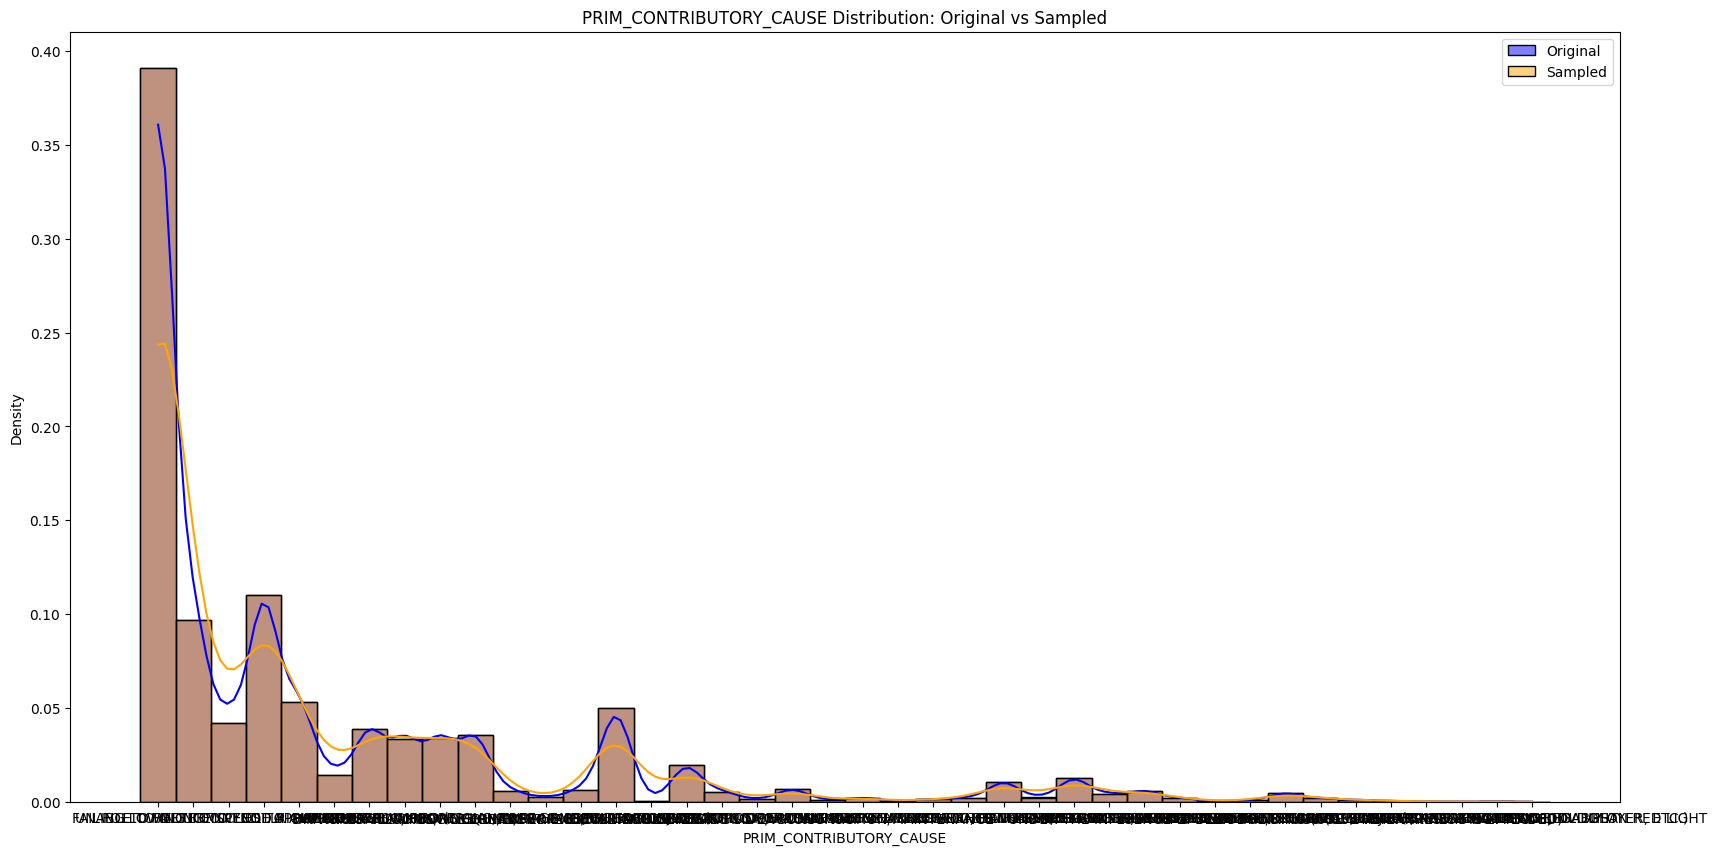

In [9]:
# Compare the distribution of a key feature like 'CRASH_TYPE'
plt.figure(figsize=(20, 10))

# Original dataset
sns.histplot(df['PRIM_CONTRIBUTORY_CAUSE'], color='blue', label='Original', stat='density', kde=True)

# Sampled dataset
sns.histplot(data['PRIM_CONTRIBUTORY_CAUSE'], color='orange', label='Sampled', stat='density', kde=True)

plt.legend()
plt.title('PRIM_CONTRIBUTORY_CAUSE Distribution: Original vs Sampled')
plt.show()


Based on the chart, the two distributions look very similar, which is a good indication that the stratified sampling has successfully preserved the overall distribution of the original dataset. This close alignment means the sample is representative of the original data, which is exactly what we aim for with stratified sampling.

### **d) Data Shape**

In [10]:
print('Our data has {} rows and {} columns'.format(data.shape[0], data.shape[1]))

Our data has 88039 rows and 48 columns


### **e) Data Description**

In [11]:
data.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,88039.000000,19773.000000,88039.000000,88038.000000,88039.000000,87845.000000,87845.000000,87845.000000,87845.000000,87845.000000,87845.000000,87845.0,88039.000000,88039.000000,88039.000000,87380.000000,87380.000000
mean,28.426095,2.568098,3686.164336,1243.905529,2.034939,0.192168,0.001264,0.019546,0.107257,0.064102,2.000649,0.0,13.215439,4.119822,6.649405,41.856643,-87.677057
std,6.179923,2.985039,2836.108946,705.346459,0.452452,0.563376,0.038596,0.161580,0.419563,0.322566,1.142847,0.0,5.578009,1.983596,3.360082,0.218023,0.423598
min,0.000000,0.000000,1.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.934763
25%,30.000000,2.000000,1250.000000,714.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.782494,-87.721859
50%,30.000000,2.000000,3201.000000,1211.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874952,-87.674584
75%,30.000000,4.000000,5600.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,9.000000,41.924729,-87.633746
max,99.000000,99.000000,13787.000000,6100.000000,18.000000,12.000000,3.000000,6.000000,12.000000,10.000000,45.000000,0.0,23.000000,7.000000,12.000000,42.022720,0.000000


Our data seems to prescribe conditions surrounding a crash as well as the crash's outcome.

The columns include:
1. CRASH_RECORD_ID: Unique ID for each crash, used to link to related datasets.
2. CRASH_DATE_EST_I: Estimated crash date if reported later.
3. CRASH_DATE: Date and time of the crash.
4. POSTED_SPEED_LIMIT: Speed limit at the crash location.
5. TRAFFIC_CONTROL_DEVICE: Traffic control device present.
6. DEVICE_CONDITION: Condition of the traffic control device.
7. WEATHER_CONDITION: Weather at the time of the crash.
8. LIGHTING_CONDITION: Lighting at the time of the crash.
9. FIRST_CRASH_TYPE: Type of first collision.
10. TRAFFICWAY_TYPE: Type of trafficway.
11. LANE_CNT: Number of through lanes.
12. ALIGNMENT: Street alignment.
13. ROADWAY_SURFACE_COND: Road surface condition.
14. ROAD_DEFECT: Road defects.
15. REPORT_TYPE: Type of report (at scene, at desk, amended).
16. CRASH_TYPE: Severity classification of the crash.
17. INTERSECTION_RELATED_I: Whether an intersection played a role.
18. NOT_RIGHT_OF_WAY_I: Whether the crash occurred outside the public right-of-way.
19. HIT_AND_RUN_I: Whether it was a hit-and-run.
20. DAMAGE: Estimated damage.
21. DATE_POLICE_NOTIFIED: Date police were notified.
22. **PRIM_CONTRIBUTORY_CAUSE: Primary cause of the crash**
23. SEC_CONTRIBUTORY_CAUSE: Secondary cause of the crash.
24. STREET_NO: Street address number.
25. STREET_DIRECTION: Street address direction.
26. STREET_NAME: Street address name.
27. BEAT_OF_OCCURRENCE: Chicago Police Department Beat ID.
28. PHOTOS_TAKEN_I: Whether photos were taken.
29. STATEMENTS_TAKEN_I: Whether statements were taken.
30. DOORING_I: Whether it involved dooring.
31. WORK_ZONE_I: Whether it occurred in a work zone.
32. WORK_ZONE_TYPE: Type of work zone.
33. WORKERS_PRESENT_I: Whether workers were present.
34. NUM_UNITS: Number of units involved.
35. MOST_SEVERE_INJURY: Most severe injury sustained1.
36. INJURIES_TOTAL: Total number of injuries.
37. NJURIES_FATAL: Number of fatal injuries.
38. INJURIES_INCAPACITATING: Number of incapacitating injuries.
39. INJURIES_NON_INCAPACITATING: Number of non-incapacitating injuries.
40. INJURIES_REPORTED_NOT_EVIDENT: Number of reported but not evident injuries.
41. INJURIES_NO_INDICATION: Number of no indication of injuries.
42. INJURIES_UNKNOWN: Number of unknown injuries.
43. CRASH_HOUR: Hour of the crash.
44. CRASH_DAY_OF_WEEK: Day of the week of the crash.
45. CRASH_MONTH: Month of the crash.
46. LATITUDE: Latitude of the crash location.
47. LONGITUDE: Longitude of the crash location.
48. LOCATION: Geographic location of the crash.

**Our Target Variable is PRIM_CONTRIBUTORY_CAUSE hence this is a classification problem**

In [12]:
for i in data['PRIM_CONTRIBUTORY_CAUSE'].unique():
    prim_percentage = (data['PRIM_CONTRIBUTORY_CAUSE'].value_counts()[i]/data['PRIM_CONTRIBUTORY_CAUSE'].value_counts().sum())*100
    sec_percentage = (data['SEC_CONTRIBUTORY_CAUSE'].value_counts()[i]/data['SEC_CONTRIBUTORY_CAUSE'].value_counts().sum())*100 if i in data['SEC_CONTRIBUTORY_CAUSE'].unique() else None
    print(f"{i}, {prim_percentage:.2f}%", end='')
    if sec_percentage is not None:
        print(f", {sec_percentage:.2f}%", end='')
    print()

FAILING TO YIELD RIGHT-OF-WAY, 11.02%, 3.25%
FOLLOWING TOO CLOSELY, 9.66%, 2.58%
NOT APPLICABLE, 5.30%, 41.21%
UNABLE TO DETERMINE, 39.08%, 35.90%
IMPROPER OVERTAKING/PASSING, 4.97%, 1.48%
IMPROPER BACKING, 3.88%, 0.81%
IMPROPER TURNING/NO SIGNAL, 3.34%, 1.03%
IMPROPER LANE USAGE, 3.56%, 1.37%
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE, 3.39%, 3.23%
FAILING TO REDUCE SPEED TO AVOID CRASH, 4.20%, 3.76%
ROAD ENGINEERING/SURFACE/MARKING DEFECTS, 0.24%, 0.09%
WEATHER, 1.45%, 1.13%
EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST, 0.18%, 0.06%
DISTRACTION - FROM INSIDE VEHICLE, 0.68%, 0.30%
DRIVING ON WRONG SIDE/WRONG WAY, 0.54%, 0.21%
PHYSICAL CONDITION OF DRIVER, 0.59%, 0.31%
ROAD CONSTRUCTION/MAINTENANCE, 0.21%, 0.12%
VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.), 0.57%, 0.30%
DISREGARDING ROAD MARKINGS, 0.12%, 0.07%
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER, 1.26%, 0.63%
DISREGARDING STOP SIGN, 1.07%, 0.29%
UNDER THE INFLUENCE OF ALCOHOL/DRUGS (US

In [13]:
def categorize_cause(cause):
    if cause in [
        'FAILING TO YIELD RIGHT-OF-WAY', 'FOLLOWING TOO CLOSELY', 'IMPROPER LANE USAGE',
        'DISREGARDING TRAFFIC SIGNALS', 'DISTRACTION - FROM INSIDE VEHICLE',
        'DISTRACTION - FROM OUTSIDE VEHICLE', 'IMPROPER TURNING/NO SIGNAL',
        'IMPROPER BACKING', 'TURNING RIGHT ON RED', 'DRIVING ON WRONG SIDE/WRONG WAY',
        'DISREGARDING STOP SIGN', 'CELL PHONE USE OTHER THAN TEXTING', 'TEXTING',
        'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)'
    ]:
        return 'Driver Error'

    elif cause in [
        'WEATHER', 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)', 'ROADWAY SURFACE COND_ICE',
        'ROAD CONSTRUCTION/MAINTENANCE', 'ROAD DEFECT_UNKNOWN', 'LIGHTING_CONDITION_DARKNESS',
        'LIGHTING_CONDITION_DAWN', 'LIGHTING_CONDITION_DUSK'
    ]:
        return 'Environmental Factors'

    elif cause in [
        'EQUIPMENT - VEHICLE CONDITION', 'BRAKE FAILURE', 'TIRE FAILURE', 'ENGINE FAILURE',
        'AIRBAG DEPLOYED_DID NOT DEPLOY'
    ]:
        return 'Mechanical Failures'

    elif cause in [
        'PEDESTRIAN ACTIONS', 'BICYCLE ADVANCING LEGALLY ON RED LIGHT', 'RELATED TO BUS STOP',
        'OBSTRUCTED CROSSWALKS', 'ELECTRONIC DEVICE USE BY PEDESTRIAN'
    ]:
        return 'Pedestrian/Cyclist Errors'

    elif cause in [
        'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)', 'PHYSICAL CONDITION OF DRIVER',
        'SLEEPING AT THE WHEEL'
    ]:
        return 'Alcohol/Drugs and Physical Condition'

    else:
        return 'Other'


In [14]:
data['PRIM_CONTRIBUTORY_CAUSE_GROUPED'] = data['PRIM_CONTRIBUTORY_CAUSE'].apply(categorize_cause)
data = data.drop(columns=['PRIM_CONTRIBUTORY_CAUSE'])
data['PRIM_CONTRIBUTORY_CAUSE_GROUPED'].nunique()


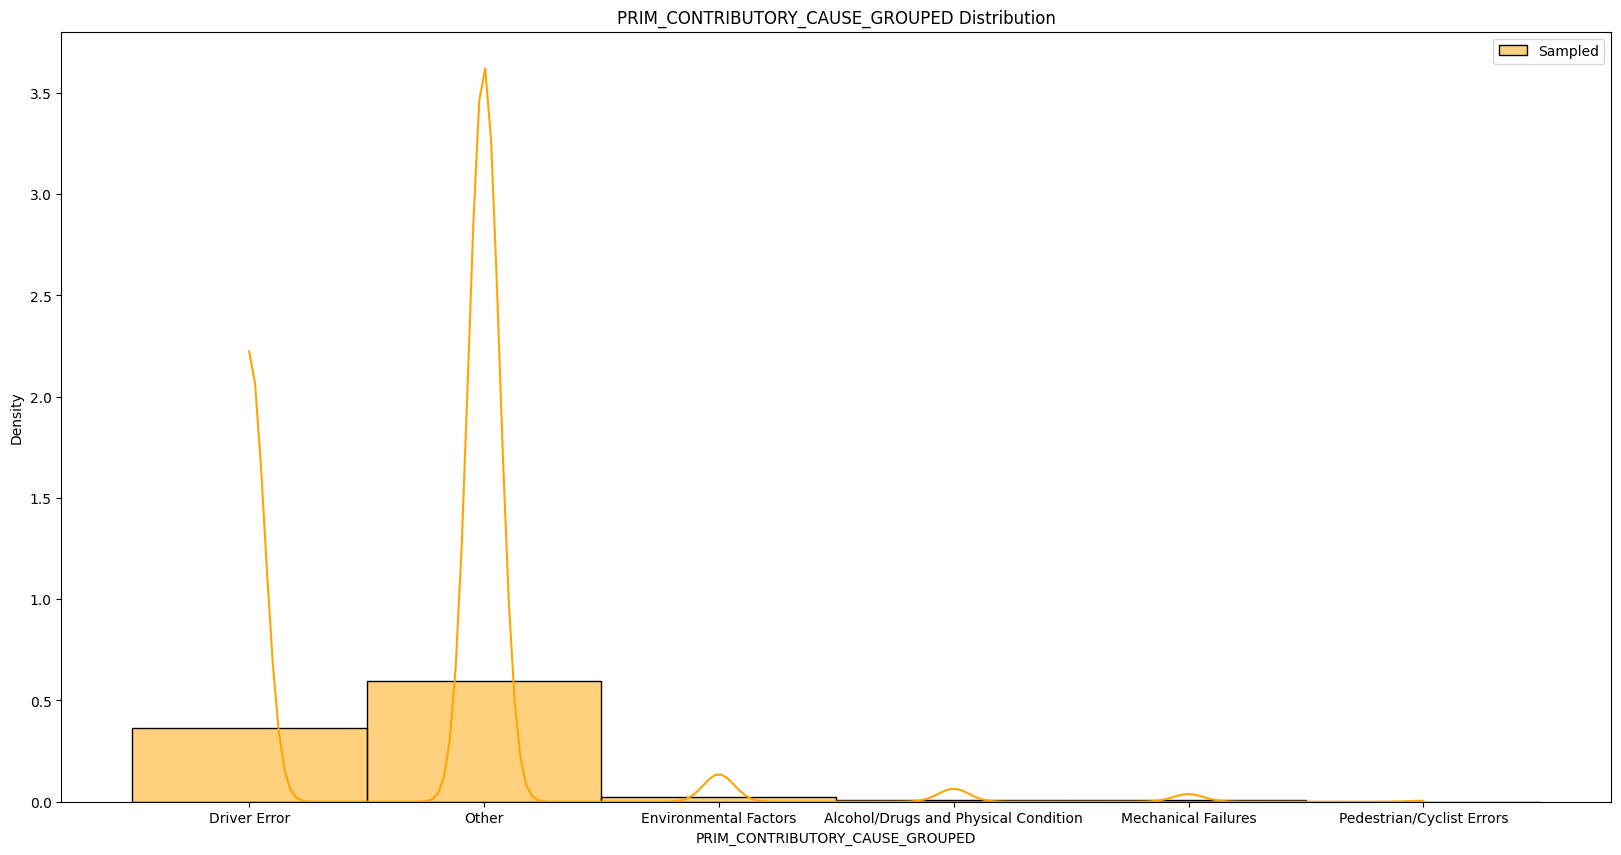

In [15]:
# Compare the distribution of a key feature like 'CRASH_TYPE'
plt.figure(figsize=(20, 10))

sns.histplot(data['PRIM_CONTRIBUTORY_CAUSE_GROUPED'], color='orange', label='Sampled', stat='density', kde=True)

plt.legend()
plt.title('PRIM_CONTRIBUTORY_CAUSE_GROUPED Distribution')
plt.show()


'PRIM_CONTRIBUTORY_CAUSE' and 'SEC_CONTRIBUTORY_CAUSE' are very highly correlated. Hence we will drop 'SEC_CONTRIBUTORY_CAUSE'

### **f) Duplicates**

In [16]:
data.duplicated().sum()

0

There are no duplicates in our dataset

Our dataset is quite large with several columns that seem to contain similar information. Below we inspect datatypes

### **g) Datatypes**

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88039 entries, 759425 to 547101
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CRASH_RECORD_ID                  88039 non-null  object 
 1   CRASH_DATE_EST_I                 6515 non-null   object 
 2   CRASH_DATE                       88039 non-null  object 
 3   POSTED_SPEED_LIMIT               88039 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE           88039 non-null  object 
 5   DEVICE_CONDITION                 88039 non-null  object 
 6   WEATHER_CONDITION                88039 non-null  object 
 7   LIGHTING_CONDITION               88039 non-null  object 
 8   FIRST_CRASH_TYPE                 88039 non-null  object 
 9   TRAFFICWAY_TYPE                  88039 non-null  object 
 10  LANE_CNT                         19773 non-null  float64
 11  ALIGNMENT                        88039 non-null  object 
 12  ROADWAY_SURFACE_C

Our dataset is quite large with several columns that seem to contain similar information.



Below we drop some columns that have limited useful information given our overall objective. First, we will combine the street information to replace our location column which has GPS coordinates


In [18]:
data['LOCATION'] = data['STREET_NO'].astype(str) + ' ' + data['STREET_DIRECTION'] + ' ' + data['STREET_NAME']
data['LOCATION'].head()

,LOCATION
759425,5622 N RIDGE AVE
619388,205 N STETSON AVE
506850,4600 N WINTHROP AVE
400644,3335 W ARGYLE ST
396286,1800 S STATE ST


In [19]:
columns_to_drop = ['CRASH_RECORD_ID','CRASH_DATE_EST_I', 'CRASH_DATE','REPORT_TYPE', 'TRAFFIC_CONTROL_DEVICE',
    'PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I','DOORING_I','STREET_NO','STREET_DIRECTION','STREET_NAME','DATE_POLICE_NOTIFIED',
    'BEAT_OF_OCCURRENCE','LANE_CNT','LATITUDE', 'LONGITUDE','INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NO_INDICATION','INJURIES_UNKNOWN','SEC_CONTRIBUTORY_CAUSE']

relevant_data = data.drop(columns = columns_to_drop, axis=1)
relevant_data.head()

,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,...,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION,PRIM_CONTRIBUTORY_CAUSE_GROUPED
759425,30,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,15,6,7,5622 N RIDGE AVE,Driver Error
619388,30,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,20,3,6,205 N STETSON AVE,Driver Error
506850,20,UNKNOWN,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,16,4,5,4600 N WINTHROP AVE,Other
400644,30,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT ON GRADE,DRY,SHOULDER DEFECT,INJURY AND / OR TOW DUE TO CRASH,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,14,1,4,3335 W ARGYLE ST,Other
396286,30,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,13,2,9,1800 S STATE ST,Other


### **h) Missing Values**

Next, we will look at missing data by column percentage.

In [20]:
relevant_data.isna().sum()/data.shape[0]*100

,0
POSTED_SPEED_LIMIT,0.000000
DEVICE_CONDITION,0.000000
WEATHER_CONDITION,0.000000
LIGHTING_CONDITION,0.000000
FIRST_CRASH_TYPE,0.000000
TRAFFICWAY_TYPE,0.000000
ALIGNMENT,0.000000
ROADWAY_SURFACE_COND,0.000000
ROAD_DEFECT,0.000000
CRASH_TYPE,0.000000


In [21]:
print([col for col in relevant_data.columns
    if relevant_data[col].isna().sum()/relevant_data.shape[0]*100 > 50])

['INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I']


From a review of the data, we need to distinguish between missing values where this indicates 'no' or 'negative' from situations with actual missing data.

Based on the most affected columns:

- INTERSECTION_RELATED_I - missing value seem to equal N (no).
- HIT_AND_RUN_I - missing value seem to equal N (no).
- NOT_RIGHT_OF_WAY_I - missing value seem to equal N (no).
- WORKZONE_I - missing value seem to equal N (no).
- WORK_ZONE_TYPE -- missing value seem to equal not a work zone.
- WORKERS_PRESENT_I- missing value seem to equal N (no).

Below we deal with missing values for these columns

In [22]:
columns_to_fill_with_N = ['INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
    'HIT_AND_RUN_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I']  #columns with many missing values which should actually be N

# Fill the selected columns with 'N'
relevant_data[columns_to_fill_with_N] = relevant_data[columns_to_fill_with_N].fillna('N') #fill the columns with N

# Fill 'WORK_ZONE_TYPE' with 'Other'
relevant_data['WORK_ZONE_TYPE'] = relevant_data['WORK_ZONE_TYPE'].fillna('Other') #fill this column with Other
relevant_data.head()


,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,...,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION,PRIM_CONTRIBUTORY_CAUSE_GROUPED
759425,30,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,15,6,7,5622 N RIDGE AVE,Driver Error
619388,30,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,20,3,6,205 N STETSON AVE,Driver Error
506850,20,UNKNOWN,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,16,4,5,4600 N WINTHROP AVE,Other
400644,30,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT ON GRADE,DRY,SHOULDER DEFECT,INJURY AND / OR TOW DUE TO CRASH,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,14,1,4,3335 W ARGYLE ST,Other
396286,30,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,13,2,9,1800 S STATE ST,Other


In [23]:
relevant_data.isna().sum()

,0
POSTED_SPEED_LIMIT,0
DEVICE_CONDITION,0
WEATHER_CONDITION,0
LIGHTING_CONDITION,0
FIRST_CRASH_TYPE,0
TRAFFICWAY_TYPE,0
ALIGNMENT,0
ROADWAY_SURFACE_COND,0
ROAD_DEFECT,0
CRASH_TYPE,0


We can drop the remaining columns with missing values as their number is small and unlikely to affect the overall data distribution materially

In [24]:
relevant_data.dropna(inplace=True)
print('We now have {} columns with missing values'.format(relevant_data.isna().sum().sum()))

We now have 0 columns with missing values


### **i) Variable Types**

In [25]:
# Separate categorical columns
categorical_columns = relevant_data.select_dtypes(include=['object']).columns.tolist()

# Separate continuous (numerical) columns
continuous_columns = relevant_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Display the separated columns
print(f"We have {len(categorical_columns)} categorical columns and {len(continuous_columns)} continuous columns")

We have 19 categorical columns and 9 continuous columns


# **3. EDA & Data Preparation**

### **a) Basic Descriptive Statistics**

- **Continuous Columns:** We will get an overview of the distribution, central tendency, and spread

In [26]:
relevant_data[continuous_columns].describe()

,POSTED_SPEED_LIMIT,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
count,87842.000000,87842.000000,87842.000000,87842.000000,87842.000000,87842.000000,87842.000000,87842.000000,87842.000000
mean,28.432242,2.035598,0.192175,0.001264,0.019546,0.107261,13.218939,4.120455,6.650429
std,6.171820,0.450934,0.563384,0.038597,0.161583,0.419569,5.572367,1.983294,3.359981
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000,2.000000,4.000000
50%,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,14.000000,4.000000,7.000000
75%,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,17.000000,6.000000,9.000000
max,99.000000,18.000000,12.000000,3.000000,6.000000,12.000000,23.000000,7.000000,12.000000


Our continuous data seems to have different scales across different features. Hence we may need to scale it

- **Categorical Columns:** We will get an overview of the distribution in each categorical column

In [27]:
relevant_data[categorical_columns].describe()

,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,MOST_SEVERE_INJURY,LOCATION,PRIM_CONTRIBUTORY_CAUSE_GROUPED
count,87842,87842,87842,87842,87842,87842,87842,87842,87842,87842,87842,87842,87842,87842,87842,87842,87842,87842,87842
unique,8,11,6,18,20,6,7,7,2,2,2,2,3,2,5,2,5,61728,6
top,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,N,N,N,"OVER $1,500",N,N,N,NO INDICATION OF INJURY,10000 W OHARE ST,Other
freq,50181,69147,56599,20304,37806,85765,64972,70106,64215,68617,84218,61325,55116,87476,87476,87738,75524,148,52264


Some of our categorical features have a lot of categories. Hence we may need to use **target encoding** to deal with high cardinality.

Target encoding replaces each category with the mean of the target variable for that category. This reduces the dimensionality by not increasing the number of features, which can help in preventing overfitting. Example: If a category is frequently associated with fatalities, the encoding will reflect that association. Target encoding should not alter the shape of our data.

### **c) Visualizations**

We will use visualizations to help display the relationships and patterns in our data intuitively.

- **Distribution of continuous features:**

**1) Histograms**

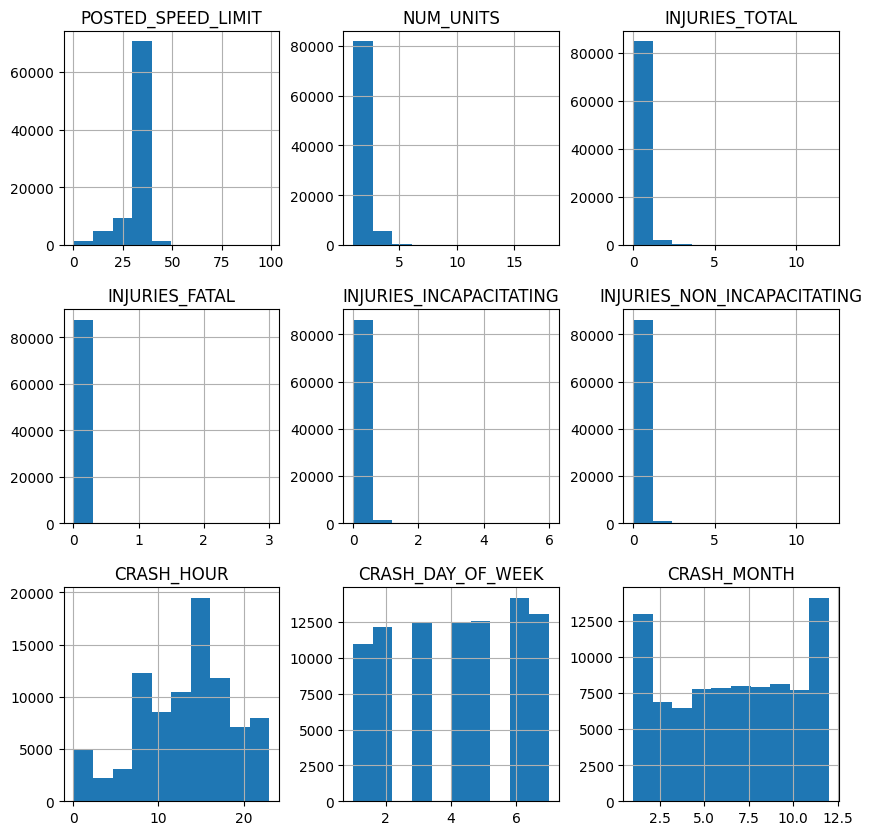

In [28]:
import matplotlib.pyplot as plt
relevant_data[continuous_columns].hist(figsize=(10, 10), bins=10) #plot histograms
plt.show()


Although we currently classify 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', as continuous features, their distributions imply that they represent discrete time periods rather than a continuous range. Each hour, day, and month is a distinct category which may have unique traffic patterns. We will convert these features to categorical

In [29]:
time_col = ['CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']


for col in time_col:
  if col in relevant_data[continuous_columns]:
    categorical_columns.append(col)
    continuous_columns.remove(col)
    relevant_data[col] = relevant_data[col].astype('object')
  else:
    continue
print('Time columns already removed')


print(f"We now have {len(categorical_columns)} categorical columns and {len(continuous_columns)} continuous columns")

Time columns already removed
We now have 22 categorical columns and 6 continuous columns


We can also visualize our continuous columns using boxplots to check for outliers

**2) Boxplots**

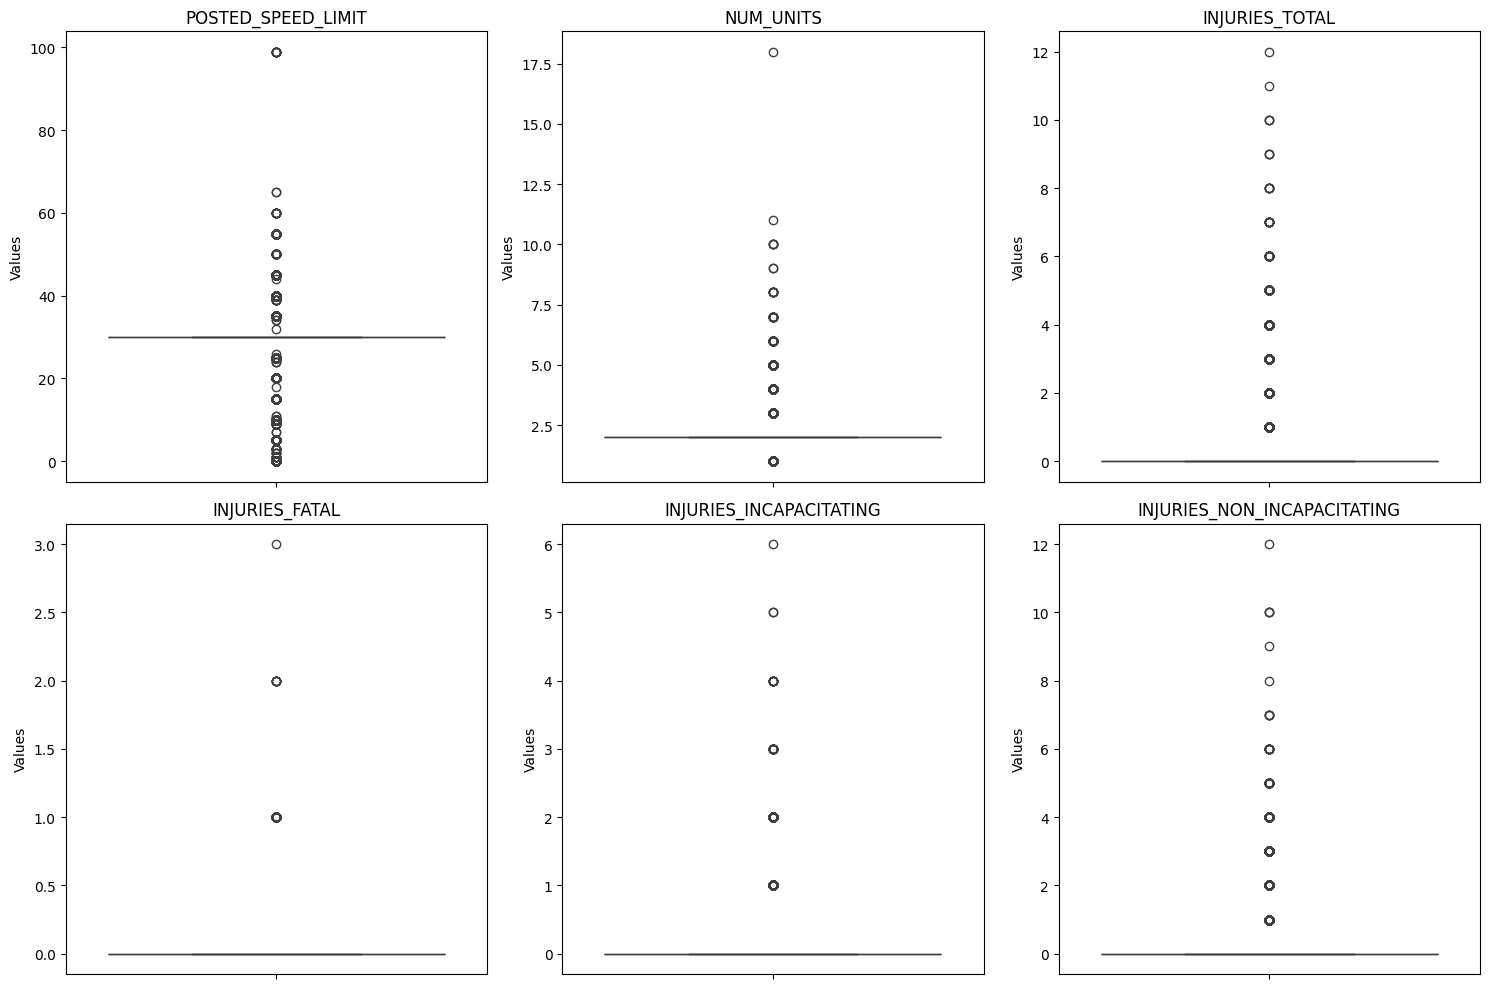

In [30]:
# Create a grid of subplots with 2 rows and 3 columns
n_cols = 3
n_rows = (len(continuous_columns) + n_cols - 1) // n_cols  # This ensures enough rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # create subplots

# Iterate over the continuous columns and plot each one in a separate subplot
for i, col in enumerate(continuous_columns):
    # Get the appropriate subplot
    ax = axes[i // n_cols, i % n_cols]

    sns.boxplot(y=relevant_data[col], ax=ax)

    # Set the title of the subplot
    ax.set_title(col)

    # Set labels for y-axis
    ax.set_ylabel("Values")

# Hide any empty subplots
for i in range(len(continuous_columns), n_rows * n_cols):
    ax = axes[i // n_cols, i % n_cols]
    ax.axis('off')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Looking at the boxplots, our continuous columns appear concentrated in certain values likely due to the nature of the crash data. It seems like there might be a lot of zero values which might give the appearance of categories but the features are actually continuous.

- **POSTED_SPEED_LIMIT:** This is continuous, but there might be common values (e.g., 30, 40 mph) that make it appear categorical.
- **NUM_UNITS:** The number of units (vehicles, people) involved in a crash. This is likely continuous (discrete, but not categorical).
- **INJURIES_TOTAL, INJURIES_FATAL, INJURIES_INCAPACITATING, INJURIES_NON_INCAPACITATING:** These are continuous as they count the number of injuries, though they might have many zeroes.

Further, our data does not seem to have any outliers.

**3) Bar Plots**

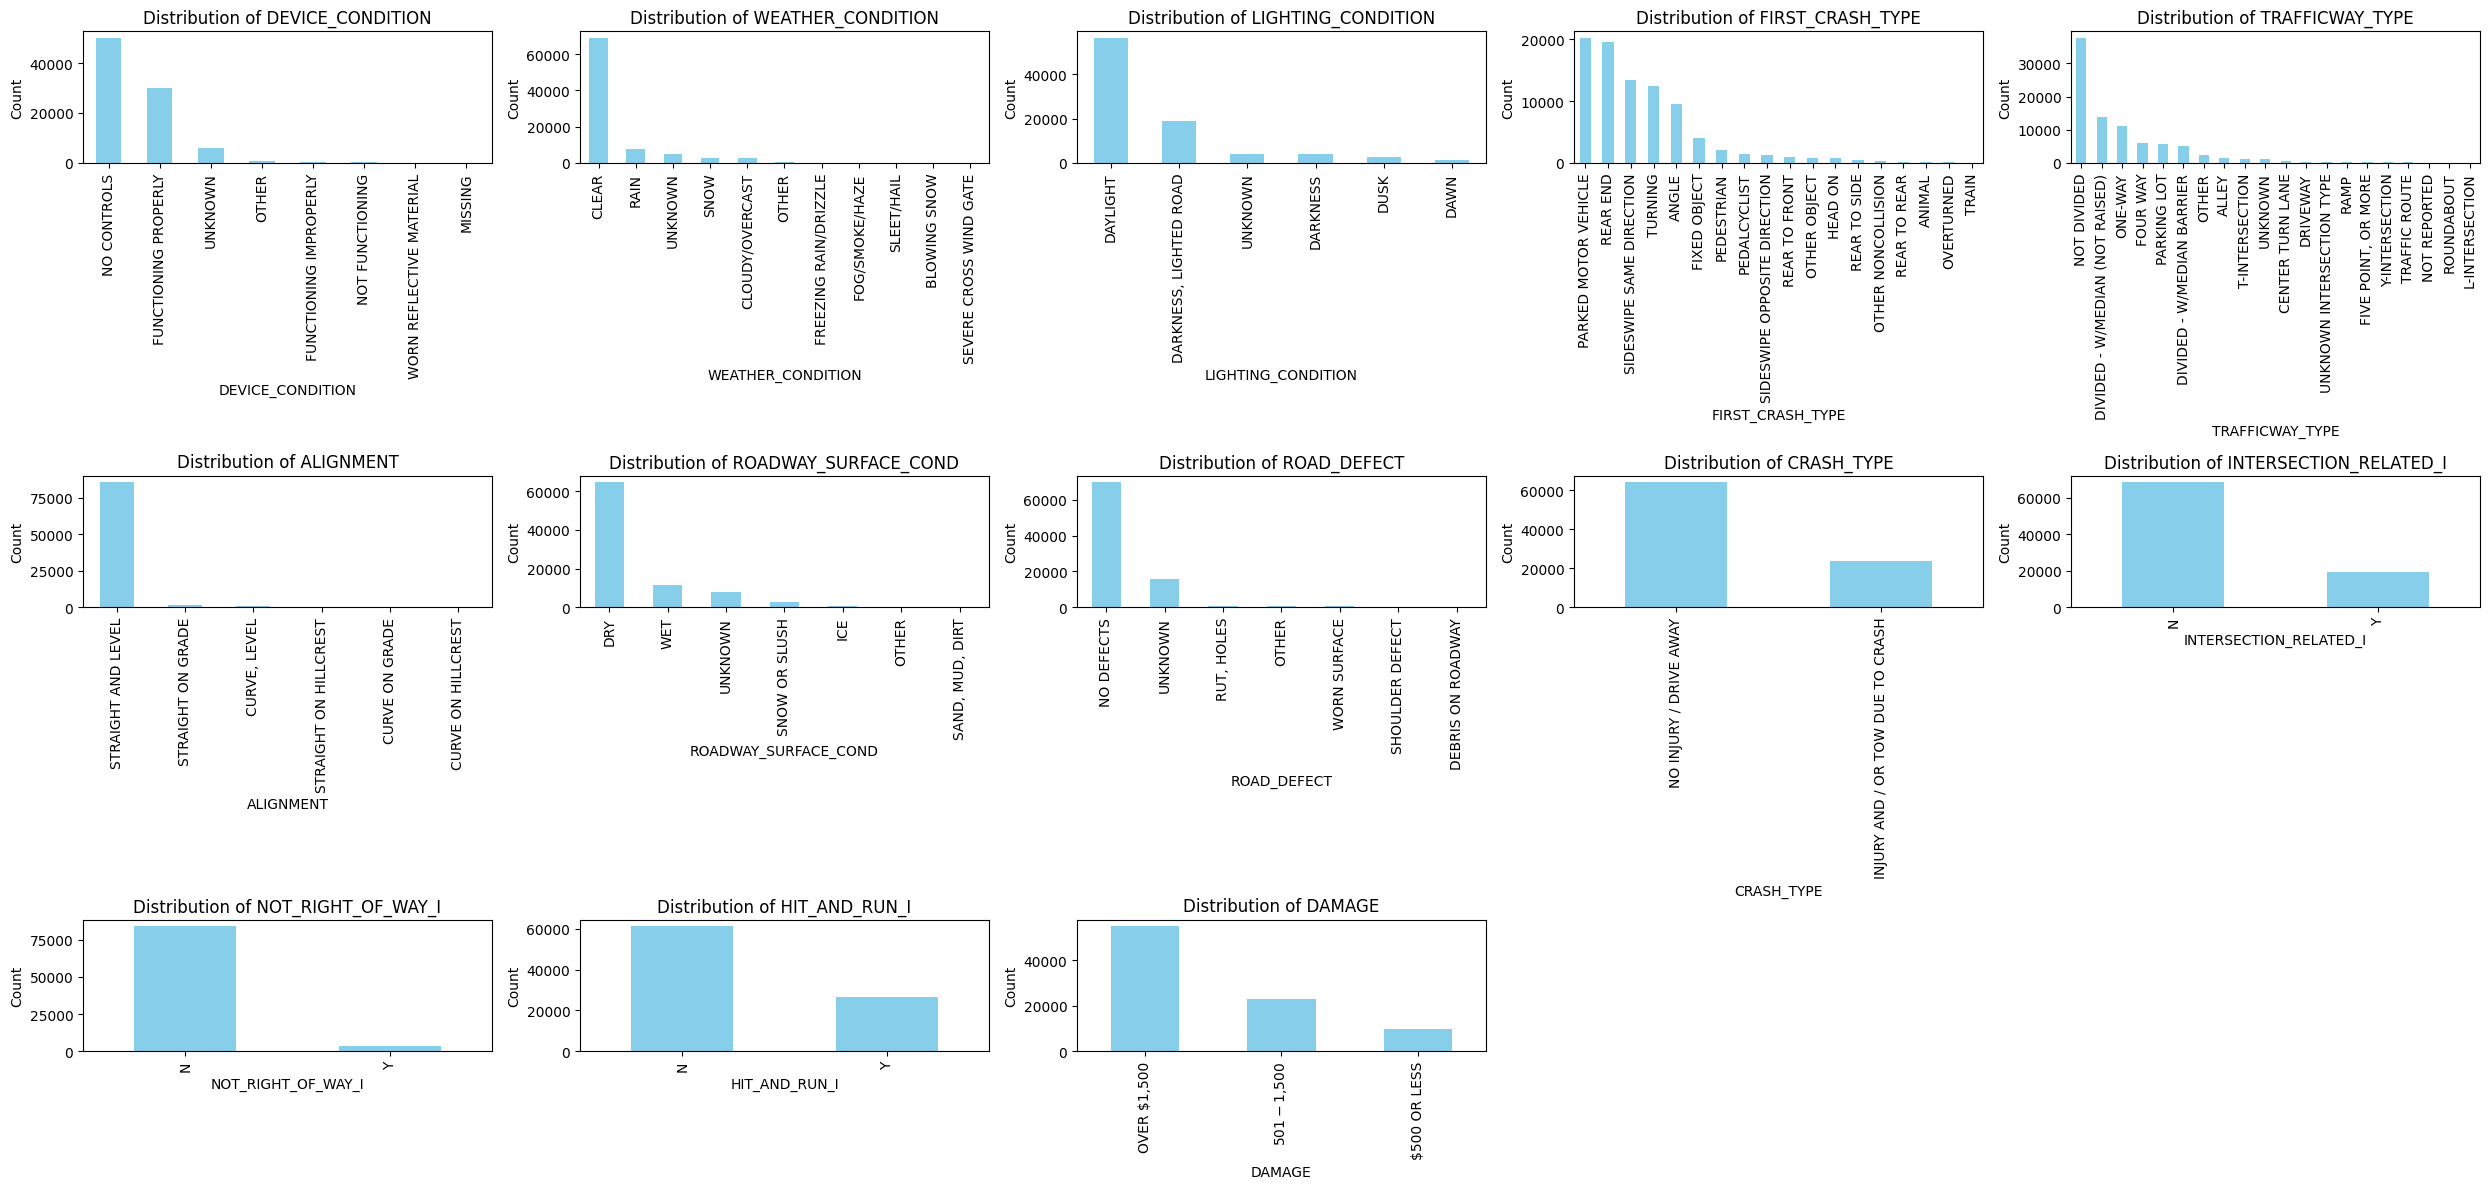

In [31]:
#we will remove location data as it is hard to represent in the plot
if 'LOCATION' in categorical_columns:
  categorical_columns.remove('LOCATION')
else:
  print('Location column already removed')

# Determine number of rows and columns for the subplots based on the number of categorical columns
n_cols = 5
n_rows = (len(categorical_columns[:13]) + n_cols - 1) // n_cols  # This ensures enough rows

fig, axes = plt.subplots(n_rows, n_cols,figsize=(25, 12)) #create subplots

axes = axes.flatten() #flatten axes

#plot each categorical column in a subplot
for i, col in enumerate(categorical_columns[:13]):
    relevant_data[col].value_counts().plot(kind = 'bar', ax=axes[i], color = 'skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

#remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() #prevent overlapping
plt.show()

Location column already removed


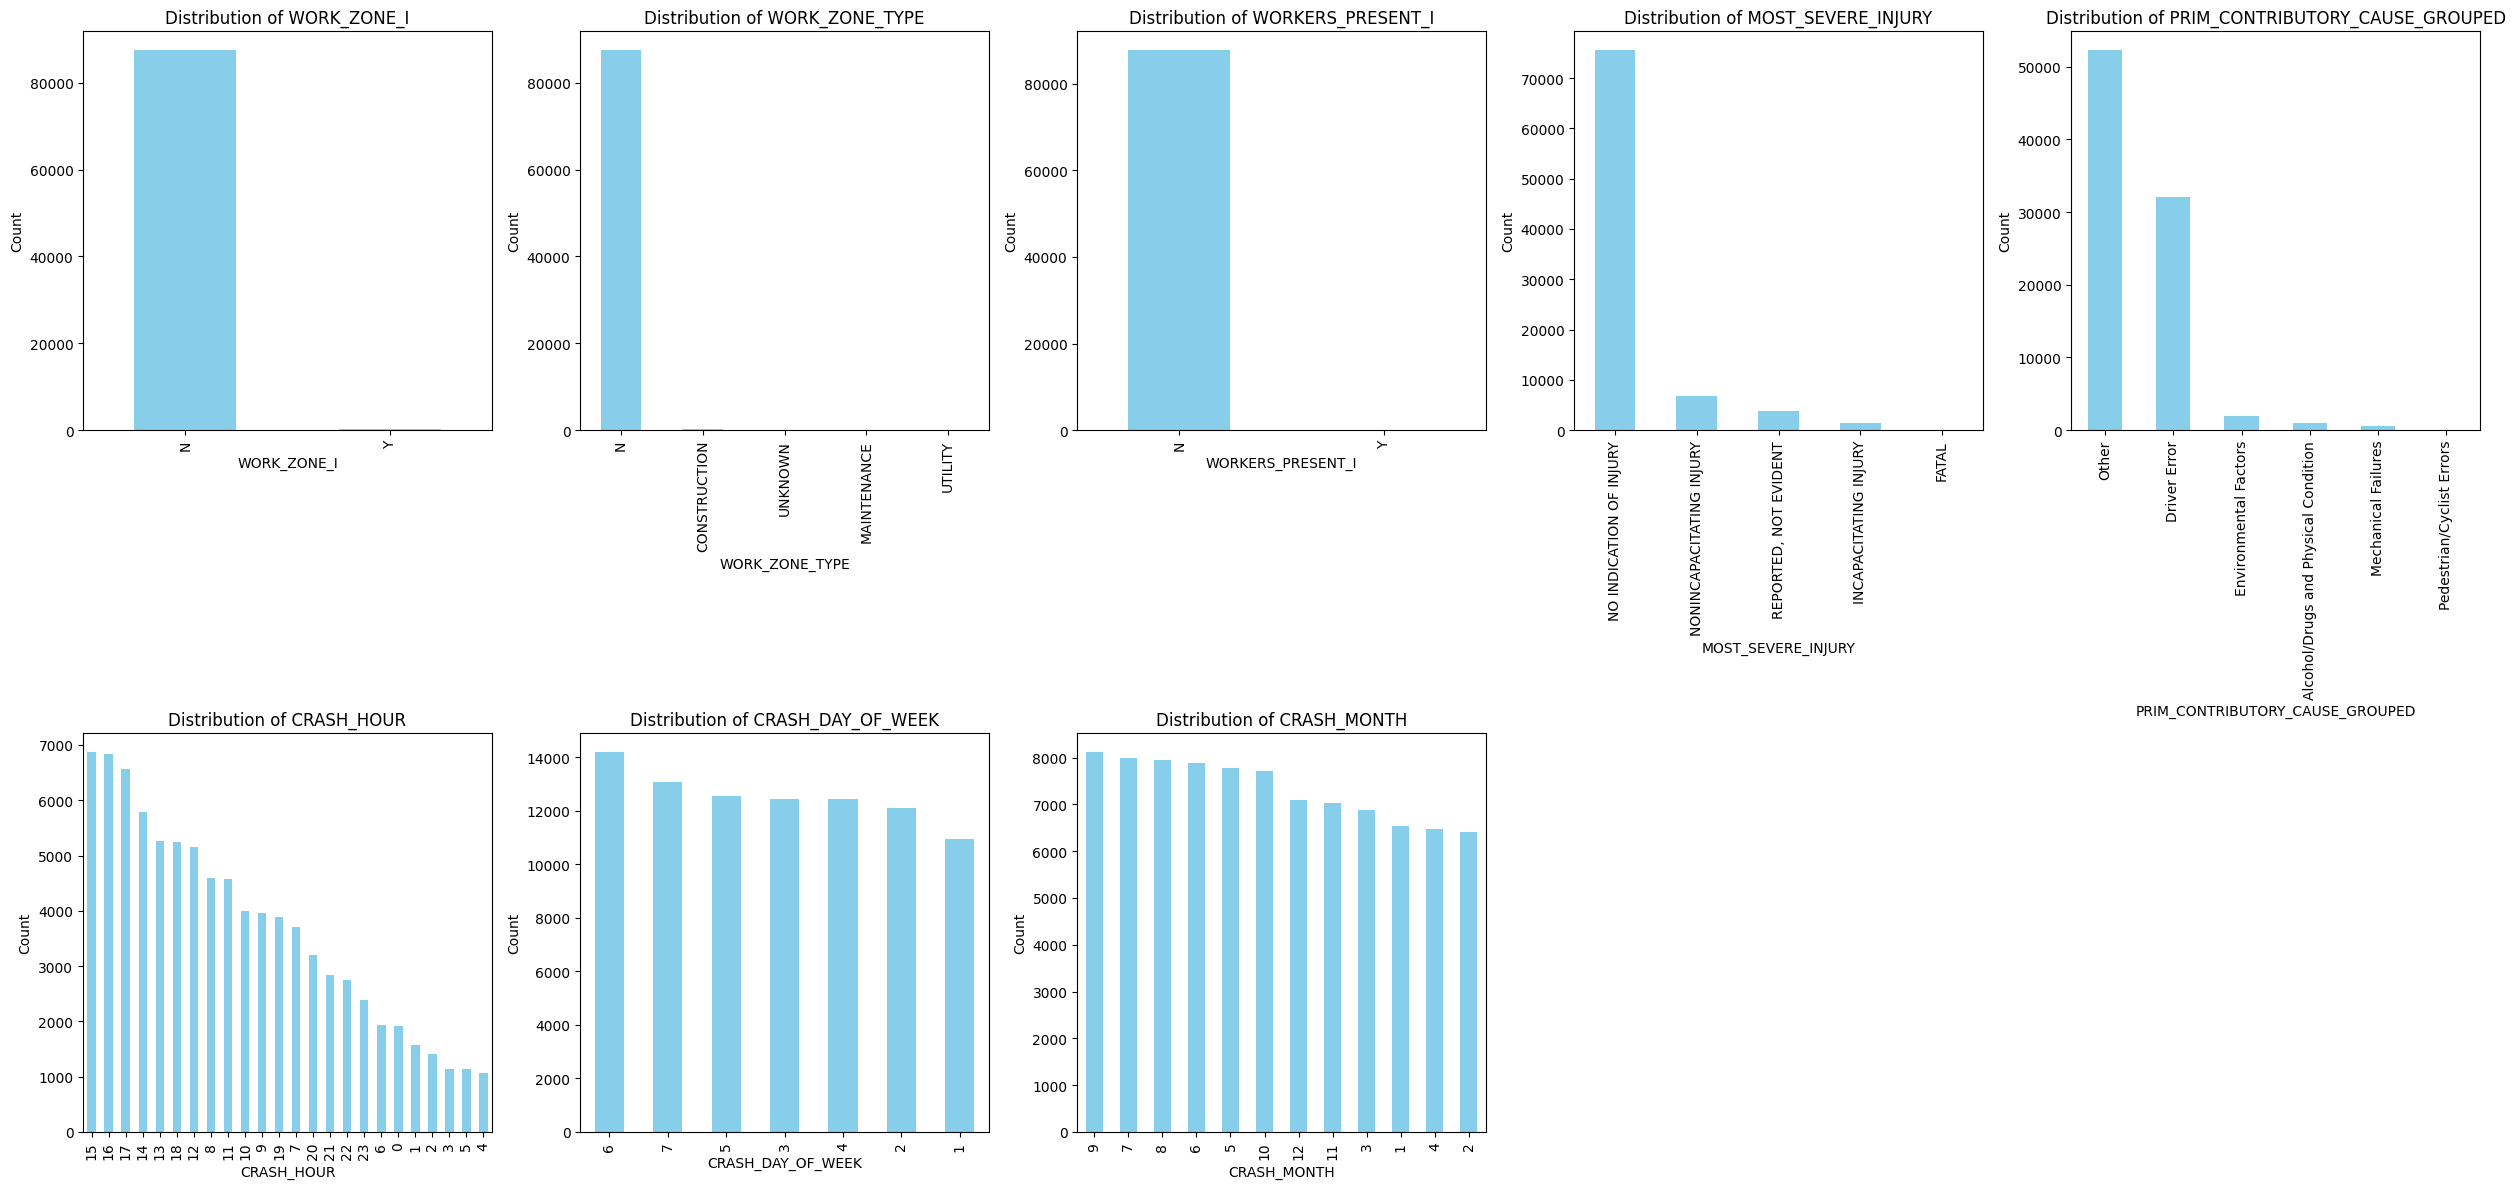

We now have 21 categorical columns and 6 continuous columns


In [32]:
#we will remove location data as it is hard to represent in the plot
if 'LOCATION' in categorical_columns:
  categorical_columns.remove('LOCATION')
else:
  print('Location column already removed')

# Determine number of rows and columns for the subplots based on the number of categorical columns
n_cols = 5
n_rows = (len(categorical_columns[13:]) + n_cols - 1) // n_cols  # This ensures enough rows

fig, axes = plt.subplots(n_rows, n_cols,figsize=(25, 12)) #create subplots

axes = axes.flatten() #flatten axes

#plot each categorical column in a subplot
for i, col in enumerate(categorical_columns[13:]):
    relevant_data[col].value_counts().plot(kind = 'bar', ax=axes[i], color = 'skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

#remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() #prevent overlapping
plt.show()
print(f"We now have {len(categorical_columns)} categorical columns and {len(continuous_columns)} continuous columns")

### **Specific Observations for Data Understanding and Preparation:**

**High Cardinality:** PRIM_CONTRIBUTORY_CAUSE (target), FIRST_CRASH_TYPE, and TRAFFICWAY_TYPE have many categories.
Suggestion: Use techniques like frequency encoding, target encoding, or feature hashing for these high-cardinality variables.

**Severe Imbalance:** WEATHER_CONDITION, LIGHTING_CONDITION, ROAD_DEFECT, MOST_SEVERE_INJURY are highly imbalanced with one dominant category.We can group rare categories into an "Other" category or use hierarchical categorization if domain knowledge allows.

**Related Variables:** WORK_ZONE_I, WORK_ZONE_TYPE, and WORKERS_PRESENT_I seem related. We can create interaction features or combined categories from these related variables.

**Potential Feature Importance:** DEVICE_CONDITION, WEATHER_CONDITION, LIGHTING_CONDITION, and ROADWAY_SURFACE_COND might be crucial for predicting PRIM_CONTRIBUTORY_CAUSE.


### **General Modeling Guidelines:**

**Imbalanced Target Variable:** PRIM_CONTRIBUTORY_CAUSE is highly imbalanced. We will use SMOTE, class weighting, or ensemble methods to help counteract this.

**Feature Selection:** Given the high number of categorical variables, feature selection techniques like mutual information could be valuable.

**Model Choice:**  Tree-based models (Random Forest, Gradient Boosting) often handle categorical variables well and can capture complex interactions. For deep learning approaches, We can use entity embeddings.

**Evaluation Metrics:** Given the imbalanced nature of the target, we will use metrics like F1-score, precision,recall, and AUC instead of just accuracy.

**Cross-validation:** Use stratified k-fold cross-validation to maintain the distribution of the target variable across folds.


### **d) Correlation Analysis**

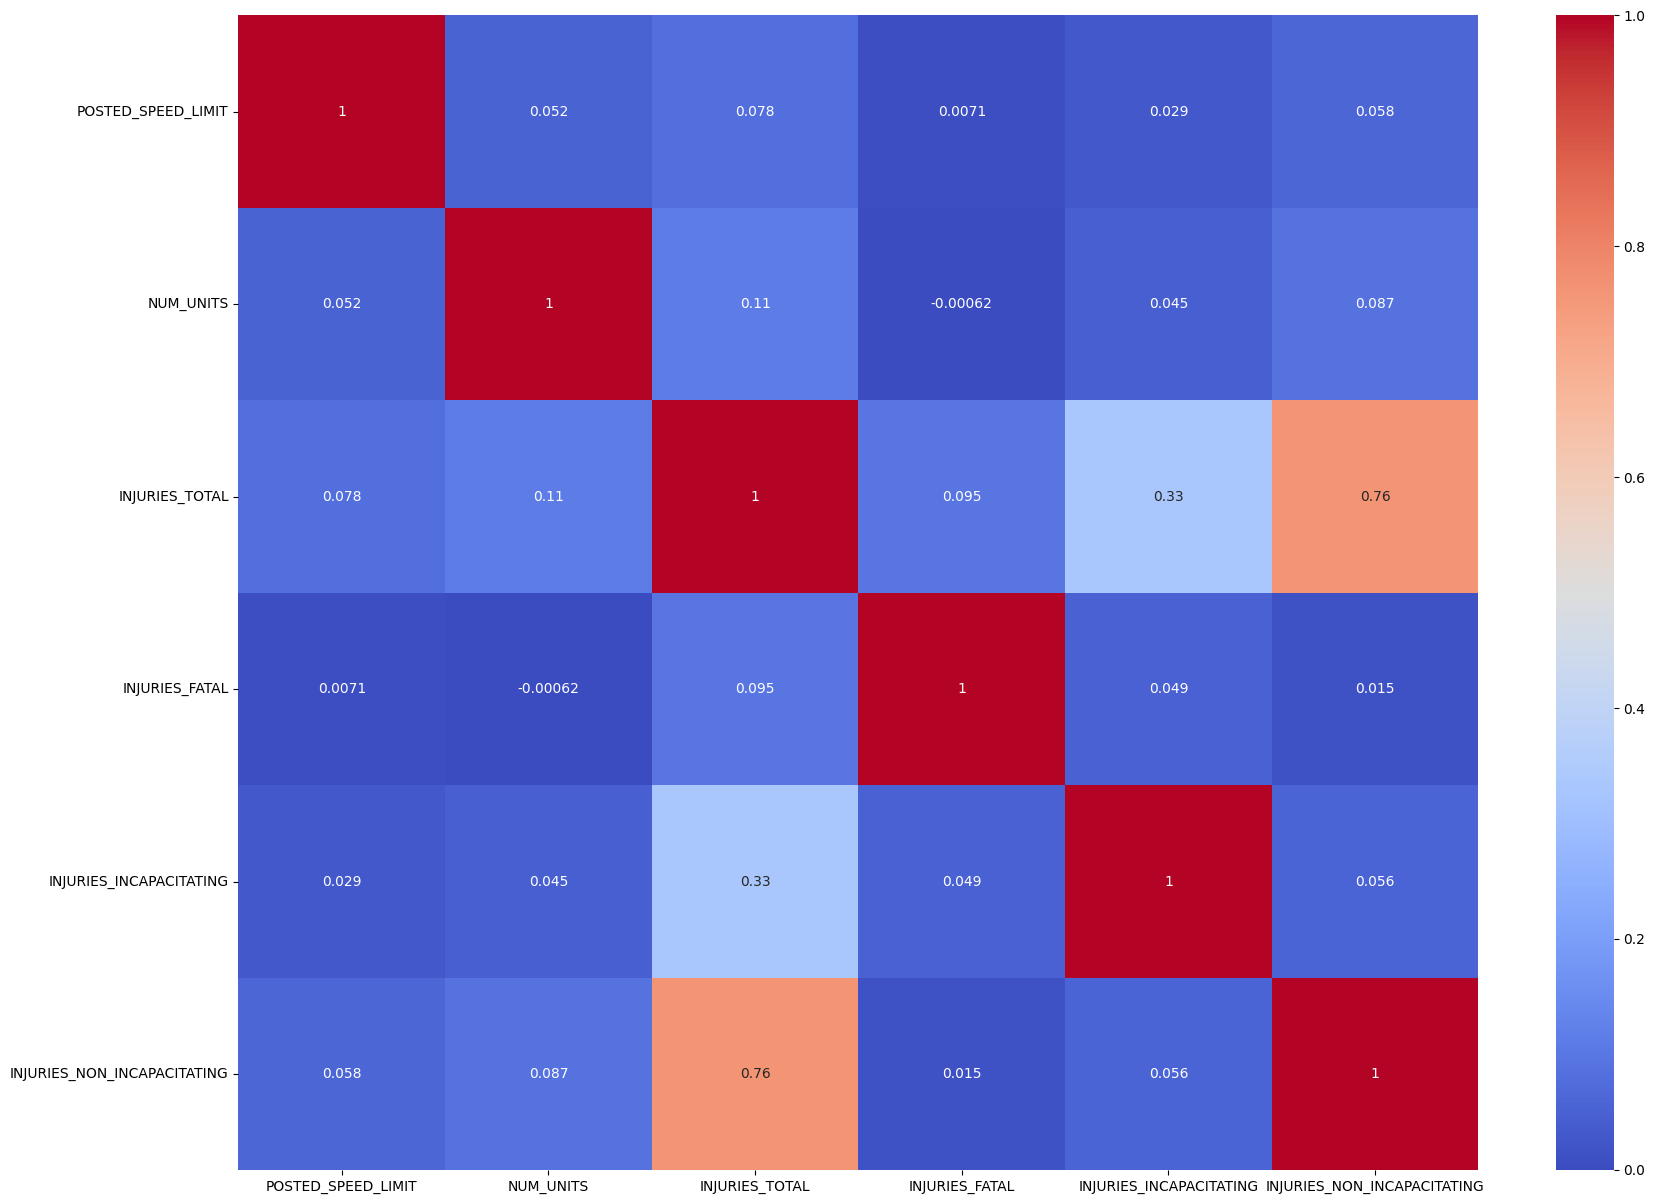

In [33]:

plt.subplots(figsize=(20,15))
sns.heatmap(relevant_data[continuous_columns].corr(),cmap="coolwarm",annot=True);

Our correlation analysis only includes numerical features with only INJURIES_TOTAL and INJURY_NON_INCAPACITATING having high correlation (77%) which is to be expected.

### **e) Encoding**

We will start by splitting our data into a training and test set before proceeding to avoid any data leakage

### **Train Test Split**

In [34]:
X=relevant_data.drop('PRIM_CONTRIBUTORY_CAUSE_GROUPED', axis=1)
y=relevant_data['PRIM_CONTRIBUTORY_CAUSE_GROUPED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (61489, 27)
X_test shape: (26353, 27)
y_train shape: (61489,)
y_test shape: (26353,)


In [35]:
if 'LOCATION' in X_train.columns:
  X_train.drop('LOCATION', axis=1, inplace=True)
  X_test.drop('LOCATION', axis=1, inplace=True)
  print(X_train.columns)
else:
  print('Location column already removed')

Index(['POSTED_SPEED_LIMIT', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I',
       'DAMAGE', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I',
       'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH'],
      dtype='object')


In [36]:
print('Summary of Frequency Distribution in our Features\n')


high_cardinality_cols = [column for column in X_train.columns if X_train[column].nunique() > 7 and X_train[column].dtype == 'object' ] #high cardinality features
print('High Cardinality Cols:', high_cardinality_cols)

low_cardinality_cols = [column for column in X_train.columns if X_train[column].nunique() <= 7 and X_train[column].dtype == 'object' ] #low cardinality features
print('Low Cardinality Cols:', low_cardinality_cols)


Summary of Frequency Distribution in our Features

High Cardinality Cols: ['DEVICE_CONDITION', 'WEATHER_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'CRASH_HOUR', 'CRASH_MONTH']
Low Cardinality Cols: ['LIGHTING_CONDITION', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'MOST_SEVERE_INJURY', 'CRASH_DAY_OF_WEEK']


In [37]:
for col in X_train.columns:
    print(col, X_train[col].nunique())

POSTED_SPEED_LIMIT 27
DEVICE_CONDITION 8
WEATHER_CONDITION 11
LIGHTING_CONDITION 6
FIRST_CRASH_TYPE 18
TRAFFICWAY_TYPE 20
ALIGNMENT 6
ROADWAY_SURFACE_COND 7
ROAD_DEFECT 7
CRASH_TYPE 2
INTERSECTION_RELATED_I 2
NOT_RIGHT_OF_WAY_I 2
HIT_AND_RUN_I 2
DAMAGE 3
WORK_ZONE_I 2
WORK_ZONE_TYPE 5
WORKERS_PRESENT_I 2
NUM_UNITS 12
MOST_SEVERE_INJURY 5
INJURIES_TOTAL 12
INJURIES_FATAL 4
INJURIES_INCAPACITATING 7
INJURIES_NON_INCAPACITATING 10
CRASH_HOUR 24
CRASH_DAY_OF_WEEK 7
CRASH_MONTH 12


Summary of Frequency Distribution in our Dataset

High Cardinality Columns:
- DEVICE_CONDITION - 8 unique values
- WEATHER_CONDITION - 12 unique values
- FIRST_CRASH_TYPE - 18 unique values
- TRAFFICWAY_TYPE - 20 unique values
- CRASH_HOUR - 24 unique values
- CRASH_MONTH - 12 unique values
- LOCATION -162789 unique values

Low Cardinality Columns:
- LIGHTING_CONDITION - 6 unique values
- ALIGNMENT - 6 unique values
- ROADWAY_SURFACE_COND - 7 unique values
- ROAD_DEFECT - 7 unique values
- CRASH_TYPE - 2 unique values
- INTERSECTION_RELATED_I - 2 unique values
- NOT_RIGHT_OF_WAY_I - 2 unique values
- HIT_AND_RUN_I - 2 unique values
- DAMAGE - 3 unique values
- WORK_ZONE_I - 2 unique values
- WORK_ZONE_TYPE - 5 unique values
- WORKERS_PRESENT_I - 2 unique values
- CRASH_DAY_OF_WEEK - 7 unique values

In [38]:
y_train.nunique()

6

### **Label Encoding**

Our target 'PRIM_CONTRIBUTORY_CAUSE' has 40 unique values whuch have a natural order so we will use label encoding for this.
Label encoding the target variable is crucial because many machine learning algorithms require numeric input. By converting the categorical target into numerical values, we enable algorithms  to interpret and process the target effectively. This step ensures the model can measure relationships between features and target classes accurately, improving the overall performance and interpretability of the model.

In [39]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder for the target
le = LabelEncoder()

# Reset the index of y_train and y_test
#y_train = y_train.reset_index(drop=True)
#y_test = y_test.reset_index(drop=True)

# Encode y_train and y_test
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Create new Pandas Series with the encoded values and the old indexes
y_train = pd.Series(y_train_encoded, index=y_train.index)
y_test = pd.Series(y_test_encoded, index=y_test.index)

y_train.unique()

array([4, 1, 0, 2, 3, 5])

In [40]:
y_train.value_counts()

,count
4,36557
1,22511
2,1355
0,649
3,373
5,44


#### **Target Encoding**
We will use target encoding to deal with our high cardinality features.

Target encoding replaces each category with the mean of the target variable for that category. This reduces the dimensionality by not increasing the number of features, which can help in preventing overfitting. Example: If a category is frequently associated with an outcome related to the values in our target (e.g., No INDICATION OF INJURY), the encoding will reflect that association. Target encoding should not alter the shape of our data

In [41]:
!pip install category_encoders

In [42]:
from category_encoders import TargetEncoder

#encode the high cardinality features
te = TargetEncoder(cols=high_cardinality_cols) #create encoder instance
te.fit(X_train, y_train_encoded) #fit the encoder
X_train_te = te.transform(X_train) #transfrom X_train
X_test_te = te.transform(X_test)  #transfrom X_test

#assign the transform values into a dataframe
X_train_te_df = pd.DataFrame(X_train_te, columns=X_train[high_cardinality_cols].columns)
X_test_te_df = pd.DataFrame(X_test_te, columns=X_test[high_cardinality_cols].columns)

#drop the original low cardinality features from our train and test set
X_train = X_train.drop(columns=high_cardinality_cols)
X_test = X_test.drop(columns=high_cardinality_cols)

# reset index of Train and Test
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

#reset index of te df
X_train_te_df = X_train_te_df.reset_index(drop=True)
X_test_te_df = X_test_te_df.reset_index(drop=True)

#update train and test feature set with the encoded values
X_train = pd.concat([X_train, X_train_te_df], axis=1)
X_test = pd.concat([X_test, X_test_te_df], axis=1)

Below we do some tests to check the integrity of our data after target encoding it



In [43]:
X_train.shape

(61489, 26)

In [44]:
X_train.head()

,POSTED_SPEED_LIMIT,LIGHTING_CONDITION,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,...,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,CRASH_DAY_OF_WEEK,DEVICE_CONDITION,WEATHER_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,CRASH_HOUR,CRASH_MONTH
0,30,DAYLIGHT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,N,N,"OVER $1,500",...,0.0,0.0,0.0,6,2.450670,2.781685,3.021482,2.674867,2.794280,2.819315
1,35,DAYLIGHT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,N,N,"$501 - $1,500",...,0.0,0.0,0.0,6,2.450670,2.781685,2.546329,2.814861,2.986352,2.824891
2,30,DAYLIGHT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,N,N,N,"$501 - $1,500",...,0.0,0.0,0.0,3,2.974959,2.781685,3.021482,3.058824,2.718173,2.821339
3,30,DAYLIGHT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,N,N,Y,"OVER $1,500",...,0.0,0.0,0.0,6,2.974959,2.781685,3.289038,2.674867,2.790929,2.797929
4,30,DAYLIGHT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,N,N,"OVER $1,500",...,0.0,0.0,0.0,1,2.450670,2.781685,2.269092,2.343391,2.758677,2.854459


In [45]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


X_train shape: (61489, 26)
X_test shape: (26353, 26)
y_train shape: (61489,)
y_test shape: (26353,)


### **One Hot Encoding**

One-hot encoding is essential for converting categorical features into a binary matrix representation, where each category is represented as a separate binary column. This process prevents the model from assuming any ordinal relationship between categorical values, which can be misleading when categories have no inherent order (e.g., weather conditions or traffic control devices). By applying one-hot encoding, we ensure that the model treats each category independently, improving its ability to capture the true relationships between features and the target.
We expect one hot encoding to change the shape of our data by increasing the number of features.

In [46]:
from sklearn.preprocessing import OneHotEncoder

#fit the ohe
ohe = OneHotEncoder(handle_unknown="ignore", drop="first")
ohe.fit(X_train[low_cardinality_cols])

#transform our train and test feature set
X_train_ohe = ohe.transform(X_train[low_cardinality_cols])
X_test_ohe = ohe.transform(X_test[low_cardinality_cols])

#assign the transform values into a dataframe
X_train_ohe_df = pd.DataFrame(X_train_ohe.toarray(), columns=ohe.get_feature_names_out(X_train[low_cardinality_cols].columns))
X_test_ohe_df = pd.DataFrame(X_test_ohe.toarray(), columns=ohe.get_feature_names_out(X_test[low_cardinality_cols].columns))

#drop the original low cardinality features from our train and test set
X_train = X_train.drop(low_cardinality_cols, axis=1)
X_test = X_test.drop(low_cardinality_cols, axis=1)

# reset index of Train and Test
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

#reset index of ohe
X_train_ohe_df = X_train_ohe_df.reset_index(drop=True)
X_test_ohe_df = X_test_ohe_df.reset_index(drop=True)


#update train and test feature set with the encoded values
X_train = pd.concat([X_train, X_train_ohe_df], axis=1 )
X_test = pd.concat([X_test, X_test_ohe_df], axis=1)

X_train.head()

,POSTED_SPEED_LIMIT,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,DEVICE_CONDITION,WEATHER_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,MOST_SEVERE_INJURY_INCAPACITATING INJURY,MOST_SEVERE_INJURY_NO INDICATION OF INJURY,MOST_SEVERE_INJURY_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT",CRASH_DAY_OF_WEEK_2,CRASH_DAY_OF_WEEK_3,CRASH_DAY_OF_WEEK_4,CRASH_DAY_OF_WEEK_5,CRASH_DAY_OF_WEEK_6,CRASH_DAY_OF_WEEK_7
0,30,2,0.0,0.0,0.0,0.0,2.450670,2.781685,3.021482,2.674867,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,35,2,0.0,0.0,0.0,0.0,2.450670,2.781685,2.546329,2.814861,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,30,2,0.0,0.0,0.0,0.0,2.974959,2.781685,3.021482,3.058824,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,30,1,0.0,0.0,0.0,0.0,2.974959,2.781685,3.289038,2.674867,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,30,2,2.0,0.0,0.0,0.0,2.450670,2.781685,2.269092,2.343391,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
X_test.head()

,POSTED_SPEED_LIMIT,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,DEVICE_CONDITION,WEATHER_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,MOST_SEVERE_INJURY_INCAPACITATING INJURY,MOST_SEVERE_INJURY_NO INDICATION OF INJURY,MOST_SEVERE_INJURY_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT",CRASH_DAY_OF_WEEK_2,CRASH_DAY_OF_WEEK_3,CRASH_DAY_OF_WEEK_4,CRASH_DAY_OF_WEEK_5,CRASH_DAY_OF_WEEK_6,CRASH_DAY_OF_WEEK_7
0,30,2,0.0,0.0,0.0,0.0,2.974959,2.670653,2.546329,3.058824,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,30,2,0.0,0.0,0.0,0.0,2.450670,2.781685,2.269092,2.674867,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,25,2,0.0,0.0,0.0,0.0,2.974959,2.781685,2.608534,2.674867,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,30,2,0.0,0.0,0.0,0.0,2.450670,2.781685,2.546329,2.814861,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,30,2,0.0,0.0,0.0,0.0,2.450670,2.781685,2.546329,2.814861,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [48]:
print('No. of rows in encoded data:', (X_train.shape[0]+X_test.shape[0]))
print('No. of rows in original data:', (relevant_data.shape[0]))
print(f'No of features in encoded data {X_train.shape[1]} in Train Set and {X_test.shape[1]} in test set:')
print('No. of features in original data:', (relevant_data.drop('MOST_SEVERE_INJURY', axis=1).shape[1]))

No. of rows in encoded data: 87842
No. of rows in original data: 87842
No of features in encoded data 56 in Train Set and 56 in test set:
No. of features in original data: 27


Our data looks ok.

### **f) Correlation Analysis**

Below, we run correlation analysis afresh after encoding our data as this will give us a better representation of the correlation our features have with the target variable since we have a numerical representation of our dataset.

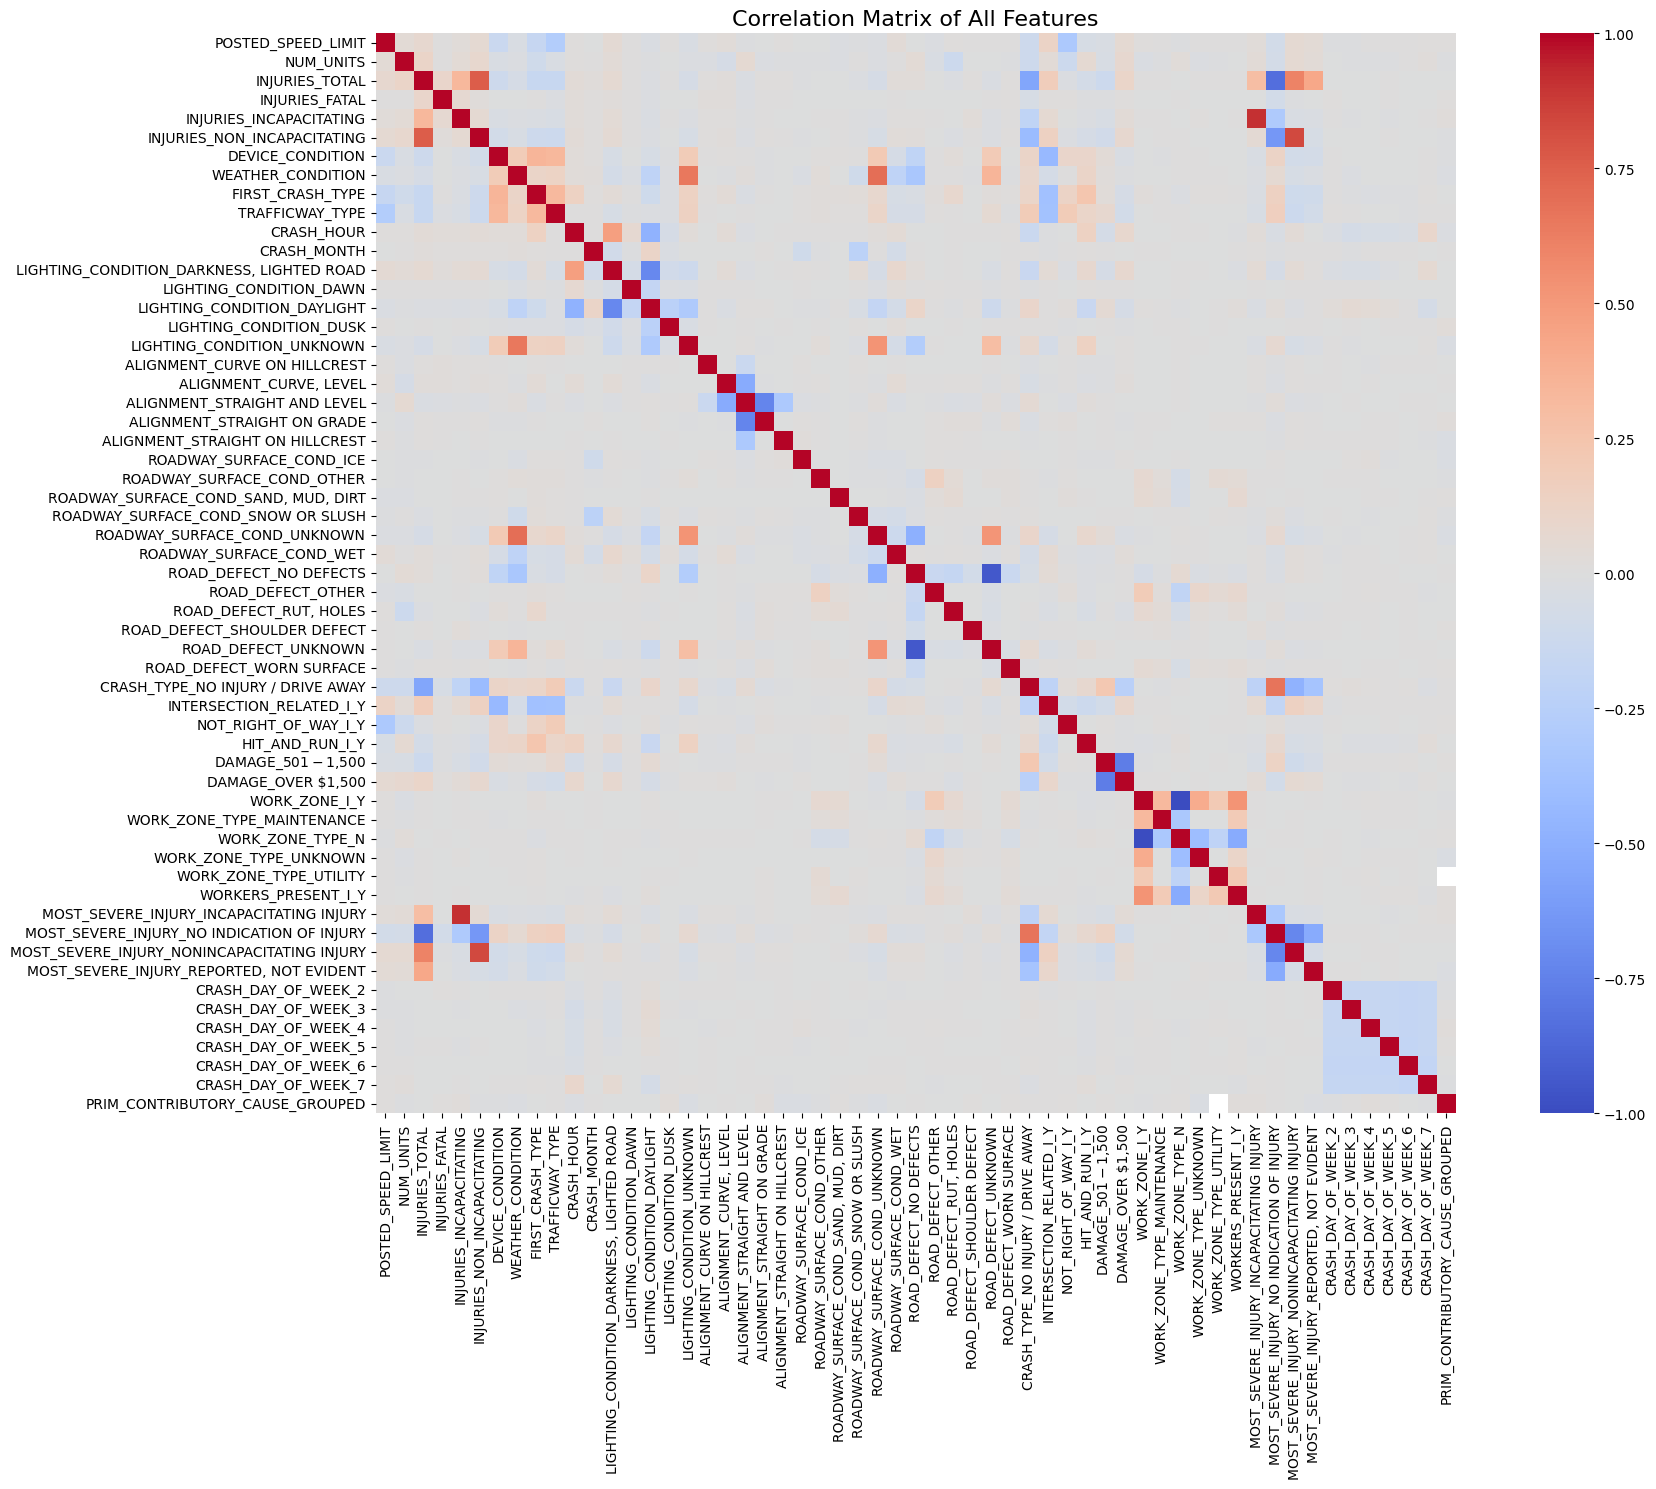

Highly correlated feature pairs:
INJURIES_INCAPACITATING - MOST_SEVERE_INJURY_INCAPACITATING INJURY: 0.91
MOST_SEVERE_INJURY_INCAPACITATING INJURY - INJURIES_INCAPACITATING: 0.91
MOST_SEVERE_INJURY_NONINCAPACITATING INJURY - INJURIES_NON_INCAPACITATING: 0.83
INJURIES_NON_INCAPACITATING - MOST_SEVERE_INJURY_NONINCAPACITATING INJURY: 0.83
INJURIES_TOTAL - INJURIES_NON_INCAPACITATING: 0.76
INJURIES_NON_INCAPACITATING - INJURIES_TOTAL: 0.76
WEATHER_CONDITION - ROADWAY_SURFACE_COND_UNKNOWN: 0.69
ROADWAY_SURFACE_COND_UNKNOWN - WEATHER_CONDITION: 0.69
CRASH_TYPE_NO INJURY / DRIVE AWAY - MOST_SEVERE_INJURY_NO INDICATION OF INJURY: 0.67
MOST_SEVERE_INJURY_NO INDICATION OF INJURY - CRASH_TYPE_NO INJURY / DRIVE AWAY: 0.67
WEATHER_CONDITION - LIGHTING_CONDITION_UNKNOWN: 0.65
LIGHTING_CONDITION_UNKNOWN - WEATHER_CONDITION: 0.65
MOST_SEVERE_INJURY_NONINCAPACITATING INJURY - INJURIES_TOTAL: 0.61
INJURIES_TOTAL - MOST_SEVERE_INJURY_NONINCAPACITATING INJURY: 0.61
WORKERS_PRESENT_I_Y - WORK_ZONE_I_Y: 0.

In [49]:
def analyze_and_plot_correlations(df, threshold=0.5, target=None):
    # Compute correlation matrix
    corr_matrix = df.corr()

    # Plot heatmap
    plt.figure(figsize=(20, 15))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True)
    plt.title('Correlation Matrix of All Features', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Get high correlations
    high_corrs = corr_matrix.unstack()
    high_corrs = high_corrs[(abs(high_corrs) > threshold) & (abs(high_corrs) < 1.0)]
    high_corrs = high_corrs.sort_values(ascending=False).reset_index()
    high_corrs.columns = ['Feature 1', 'Feature 2', 'Correlation']

    # Print highly correlated feature pairs
    print("Highly correlated feature pairs:")
    for _, row in high_corrs.iterrows():
        print(f"{row['Feature 1']} - {row['Feature 2']}: {row['Correlation']:.2f}")

    # Focus on specific feature correlations if provided
    if target is not None:
        target_corrs = corr_matrix[target]
        target_corrs = target_corrs[(abs(target_corrs) > threshold) & (abs(target_corrs) < 1.0)]
        target_corrs = target_corrs.sort_values(key=abs, ascending=False)

        print(f"\nFeatures highly correlated with {target}:")
        for feat, corr in target_corrs.items():
            print(f"{feat}: {corr:.2f}")


X_train_plus_target = pd.concat([X_train, y_train.rename('PRIM_CONTRIBUTORY_CAUSE_GROUPED')], axis=1) #add back y_train to X_train to perform correlation analysis

analyze_and_plot_correlations(X_train_plus_target, threshold=0.5, target='PRIM_CONTRIBUTORY_CAUSE_GROUPED')


Our data is ready for modeling. We have several highly correlated features which is expected after One Hot Encoding. We will keep the unrelated features in mind when we are modeling to prevent the effects of multicollinearity.E.g. we may neeed to use Lasso or Ridge to handle multicollinearity by shrinking the coefficients of correlated variables or use Principal Component Analysis to transform the feature space into a smaller set of uncorrelated variable which will also help in reducing dimensionality.

Additionally, we have one feature that is highly correlated to our target: LOCATION. We should look out for the importance of this feature when we do our modeling.

# 4. Modeling

In [50]:
#import necessary packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from keras import models, layers, optimizers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, silhouette_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA


### **1) Baseline Model: Dummy Classifier**

In [51]:
# Fit the DummyClassifier (baseline model)
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_clf.fit(X_train, y_train)

# Predict using the baseline model on the test set
y_pred_baseline = dummy_clf.predict(X_test)

# Calculate accuracy score
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Model Accuracy: {accuracy_baseline:.4f}")

# Generate the classification report
print("\nBaseline Model Classification Report:")
print(classification_report(y_test, y_pred_baseline, zero_division=0, target_names=relevant_data['PRIM_CONTRIBUTORY_CAUSE_GROUPED'].unique()));

Baseline Model Accuracy: 0.5960

Baseline Model Classification Report:
                                      precision    recall  f1-score   support

                        Driver Error       0.00      0.00      0.00       278
                               Other       0.00      0.00      0.00      9589
               Environmental Factors       0.00      0.00      0.00       591
Alcohol/Drugs and Physical Condition       0.00      0.00      0.00       167
                 Mechanical Failures       0.60      1.00      0.75     15707
           Pedestrian/Cyclist Errors       0.00      0.00      0.00        21

                            accuracy                           0.60     26353
                           macro avg       0.10      0.17      0.12     26353
                        weighted avg       0.36      0.60      0.45     26353



**Summary of Findings from the Baseline Dummy Classifier**

The baseline model, a dummy classifier, achieved an **accuracy** of **39.15%** mainly driven by the class TEXTING prevalence in the dataset

**Performance Across Classes:** The model exhibited a significant performance disparity across classes. Notably, the only class with non-zero predictions was TEXTING, which had:
- Precision: 0.39
- Recall: 1.00
- F1-score: 0.56

**Zero Predictions:** All other classes received a precision, recall, and F1-score of 0.00, indicating that the model failed to predict any instances correctly for those categories.
The F1-score (0.01) demonstrates that the model struggles significantly across the different classes.

### **2) Logistic Regression**

The performance of the baseline dummy classifier highlights the need for a more robust modeling approach, such as Logistic Regression, which is capable of learning from the feature set and identifying patterns that the dummy model failed to capture.

We will run PCA to make our code run quicker by only considering features that contribute to a majority of the variance


In [52]:
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train)
X_test_pca = scaler.transform(X_test)

pca = PCA(n_components=0.9, svd_solver='full')  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)


In [53]:
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42) #instaniate our logistic regression model

logreg.fit(X_train_pca, y_train)

y_pred = logreg.predict(X_test_pca)

# Calculate accuracy score
accuracy_baseline = accuracy_score(y_test, y_pred)
print(f"Baseline Model Accuracy: {accuracy_baseline:.4f}")

# Generate the classification report
print("\nLogistic Regression Model Classification Report:")
print(classification_report(y_test, y_pred_baseline, zero_division=0, target_names=relevant_data['PRIM_CONTRIBUTORY_CAUSE_GROUPED'].unique()));


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Baseline Model Accuracy: 0.6372

Logistic Regression Model Classification Report:
                                      precision    recall  f1-score   support

                        Driver Error       0.00      0.00      0.00       278
                               Other       0.00      0.00      0.00      9589
               Environmental Factors       0.00      0.00      0.00       591
Alcohol/Drugs and Physical Condition       0.00      0.00      0.00       167
                 Mechanical Failures       0.60      1.00      0.75     15707
           Pedestrian/Cyclist Errors       0.00      0.00      0.00        21

                            accuracy                           0.60     26353
                           macro avg       0.10      0.17      0.12     26353
                        weighted avg       0.36      0.60      0.45     26353



In [54]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Apply SMOTE to oversample the minority classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, y_train)



# Fit the logistic regression model on resampled data
log_reg_smote = LogisticRegression(max_iter=10000, solver='lbfgs', penalty ='l2',C=1)
log_reg_smote.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_smote = log_reg_smote.predict(X_test_pca)

# Print classification report
print("Logistic Regression Model after SMOTE:")
print('accuracy score', accuracy_score(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))


Logistic Regression Model after SMOTE:
accuracy score 0.33518005540166207
              precision    recall  f1-score   support

           0       0.06      0.52      0.10       278
           1       0.53      0.35      0.42      9589
           2       0.11      0.63      0.19       591
           3       0.02      0.28      0.03       167
           4       0.82      0.31      0.45     15707
           5       0.00      0.29      0.00        21

    accuracy                           0.34     26353
   macro avg       0.26      0.40      0.20     26353
weighted avg       0.68      0.34      0.43     26353



In [55]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize model
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

# Define a simplified param grid
param_grid = {
    'C': [0.01, 1, 100],  # Regularization strength
    'penalty': ['l2'],     # Focus on one penalty
    'solver': ['lbfgs'],   # Use one solver
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=logreg,
                                   param_distributions=param_grid,
                                   n_iter=5,             # Fewer iterations
                                   scoring='f1_weighted',
                                   cv=3,                 # Fewer folds
                                   n_jobs=-1,
                                   verbose=1,
                                   random_state=42)

# Fit the model
random_search.fit(X_train_pca, y_train)  # Make sure you're using PCA here

# Display the best parameters and score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score (F1):", random_search.best_score_)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Hyperparameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1}
Best Score (F1): 0.6107428247146846


In [56]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Fit the model on the training data
rf_model.fit(X_train_pca, y_train)
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_pca)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)

class_report_rf = classification_report(y_test, y_pred_rf,zero_division=0, target_names=relevant_data['PRIM_CONTRIBUTORY_CAUSE_GROUPED'].unique())

print(f'Random Forest Accuracy: {accuracy_rf:.4f}')
print('Classification Report:')
print(class_report_rf)


Random Forest Accuracy: 0.6183
Classification Report:
                                      precision    recall  f1-score   support

                        Driver Error       0.18      0.01      0.01       278
                               Other       0.53      0.41      0.46      9589
               Environmental Factors       0.28      0.05      0.08       591
Alcohol/Drugs and Physical Condition       0.00      0.00      0.00       167
                 Mechanical Failures       0.66      0.78      0.72     15707
           Pedestrian/Cyclist Errors       0.00      0.00      0.00        21

                            accuracy                           0.62     26353
                           macro avg       0.27      0.21      0.21     26353
                        weighted avg       0.59      0.62      0.60     26353



In [57]:
import xgboost as xgb

# Convert your data into DMatrix format, which is optimized for XGBoost
dtrain = xgb.DMatrix(X_train_pca, label=y_train)
dtest = xgb.DMatrix(X_test_pca, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Multi-class classification
    'num_class': len(y.unique()),   # Number of classes
    'max_depth': 6,                 # Maximum depth of the tree
    'eta': 0.3,                     # Learning rate
    'subsample': 0.8,               # Subsample ratio
    'colsample_bytree': 0.8,        # Column sample ratio
    'seed': 42                      # Random seed
}

# Train the model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(dtest)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

print(f'XGBoost Accuracy: {accuracy_xgb:.4f}')
print('Classification Report:')
print(class_report_xgb)


XGBoost Accuracy: 0.6325
Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.01      0.03       278
           1       0.54      0.48      0.51      9589
           2       0.30      0.08      0.12       591
           3       0.17      0.01      0.01       167
           4       0.68      0.76      0.72     15707
           5       0.00      0.00      0.00        21

    accuracy                           0.63     26353
   macro avg       0.33      0.22      0.23     26353
weighted avg       0.61      0.63      0.62     26353



Num GPUs Available:  0
Epoch 1/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5108 - loss: 1.1668 - val_accuracy: 0.6402 - val_loss: 0.7938
Epoch 2/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6236 - loss: 0.8157 - val_accuracy: 0.6466 - val_loss: 0.7688
Epoch 3/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6227 - loss: 0.7904 - val_accuracy: 0.6477 - val_loss: 0.7573
Epoch 4/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6260 - loss: 0.7734 - val_accuracy: 0.6482 - val_loss: 0.7520
Epoch 5/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6279 - loss: 0.7697 - val_accuracy: 0.6486 - val_loss: 0.7475
Epoch 6/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6265 - loss: 0.7618 - val_accuracy: 0.6490 - val_loss: 0.7450
Epoch 7/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6331 - loss: 0.7672 - val_accuracy: 0.6486 - val_loss: 0.7437
Epoch 8/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Neural Network Accuracy: 0.6405
Confusion Matrix:
[[    0    42     0     0   236     0]
 [    0  4310    22     0  5257     0]
 [    0   194    38     0   359     0]
 [    0    35     1     0   131     0]
 [    0  3134    42     0 12531     0]
 [    0     3     0     0    18     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       278
           1       0.56      0.45      0.50      9589
           2       0.37      0.06      0.11       591
           3       0.00      0.00      0.00       167
           4       0.68      0.80      0.73     15707
           5       0.00      0.00      0.00        21

    accuracy                           0.64     26353
   macro avg       0.27      0.22      0.22     26353
weighted avg       0.61      0.64      0.62     26353



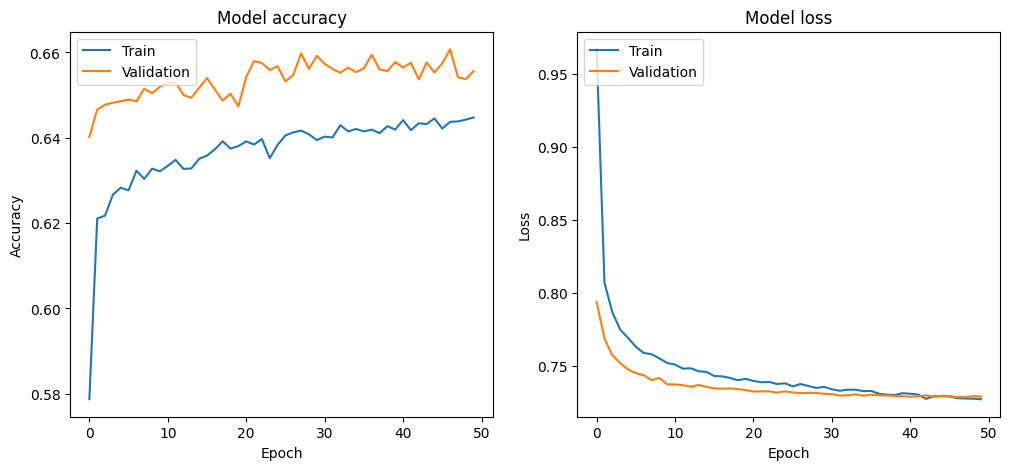

In [58]:
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
import tensorflow as tf

# Check if GPU is available
gpu_available = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpu_available))


# Create a Sequential model
model = keras.Sequential()

# Input layer
model.add(layers.Input(shape=(X_train_pca.shape[1],)))

# Hidden layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))  # Dropout for regularization
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))


# Output layer
model.add(layers.Dense(len(y.unique()), activation='softmax'))  # Use softmax for multi-class classification
model.compile(loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
# Train the model
history = model.fit(X_train_pca, y_train, epochs=50, batch_size=32, validation_split=0.2)
# Make predictions
y_pred_nn = np.argmax(model.predict(X_test_pca), axis=-1)

# Evaluate performance
accuracy_nn = accuracy_score(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
class_report_nn = classification_report(y_test, y_pred_nn)

print(f'Neural Network Accuracy: {accuracy_nn:.4f}')
print('Confusion Matrix:')
print(conf_matrix_nn)
print('Classification Report:')
print(class_report_nn)
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


Num GPUs Available:  0
Epoch 1/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.0838 - loss: 2.1417 - val_accuracy: 0.3510 - val_loss: 1.6723
Epoch 2/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1854 - loss: 2.0496 - val_accuracy: 0.3594 - val_loss: 1.6480
Epoch 3/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2146 - loss: 1.8028 - val_accuracy: 0.4057 - val_loss: 1.5946
Epoch 4/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2415 - loss: 1.6902 - val_accuracy: 0.3980 - val_loss: 1.5828
Epoch 5/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.2507 - loss: 1.7012 - val_accuracy: 0.3929 - val_loss: 1.5817
Epoch 6/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2634 - loss: 1.6945 - val_accuracy: 0.3424 - val_loss: 1.5810
Epoch 7/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2702 - loss: 1.5748 - val_accuracy: 0.2974 - val_loss: 1.6082
Epoch 8/50
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy

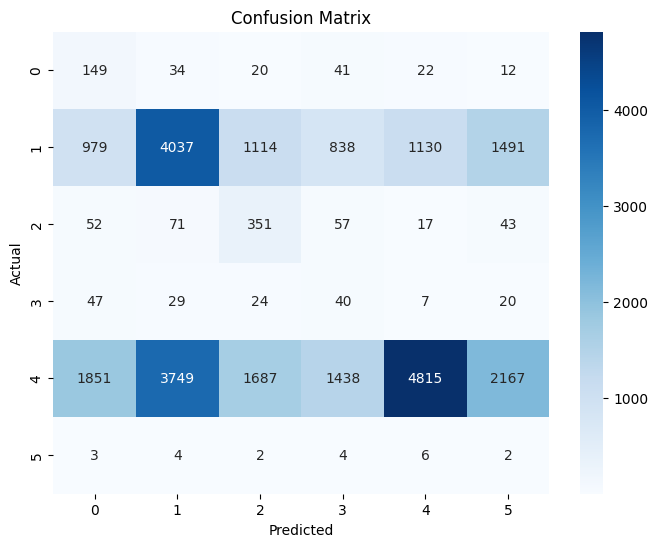

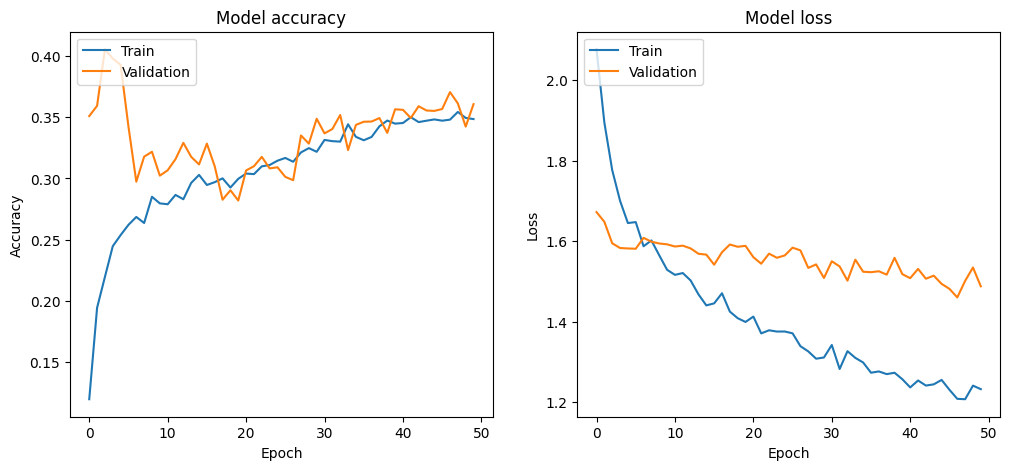

In [61]:
from tensorflow import keras
from tensorflow.keras import layers, optimizers, callbacks
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

# Check if GPU is available
gpu_available = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpu_available))

# Convert y_train to NumPy array with integer values
#y_train = y_train.values.astype(int)  # Ensure values are integers

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
# Create a Sequential model
model = keras.Sequential()

# Input layer
model.add(layers.Input(shape=(X_train_pca.shape[1],)))

# Hidden layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(32, activation='relu'))

# Output layer for multi-class classification
model.add(layers.Dense(len(y.unique()), activation='softmax'))

# Compile the model with a low learning rate and Adam optimizer
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])



# Train the model with early stopping and class weights
history = model.fit(X_train_pca, y_train,
                    epochs=50, batch_size=32,
                    validation_split=0.2,
                    class_weight=class_weight_dict,
                    )

# Make predictions on the test set
y_pred_nn = np.argmax(model.predict(X_test_pca), axis=-1)

# Evaluate performance
accuracy_nn = accuracy_score(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
class_report_nn = classification_report(y_test, y_pred_nn)

# Print accuracy and classification report
print(f'Neural Network Accuracy: {accuracy_nn:.4f}')
print('Confusion Matrix:')
print(conf_matrix_nn)
print('Classification Report:')
print(class_report_nn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()


# 5. Model Validation

# 6. Conclusion and Summary